# **Ticket Assignment Project**


---



One of the key activities of any IT function is to “Keep the lights on” to sure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service orreduction in the quality of an IT service that affects the Users and the Business. 

**Goal** - To build a classifier that can classify the tickets by analyzing text

---



In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = "input_data_NLP1.xlsx"

**Section1 : Import required libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_excel (f"{project_path}{filename}")


**Section2 : Exploratory Data Analysis**

---
Conduct a Exploratory data analysis - explore using numerical and visuals - the shape of data, datatypes, missing information, distribution of data, look out for any class imbalance. The findings in this section with be used to make changes to the dataset in the next section


In [ ]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
data.shape

(8500, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
print("Number of groups = ",len(data['Assignment group'].unique()))

Number of groups =  74


In [ ]:
data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


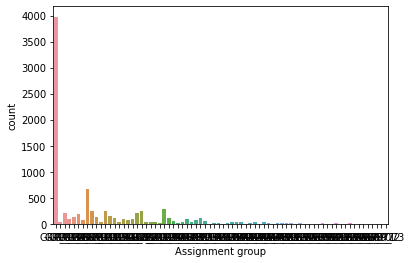

In [ ]:
sns.countplot(data['Assignment group'])

In [ ]:
data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_61       1
GRP_64       1
GRP_67       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:
# Top 20 assignment groups - In percentage
data_top_20 = data['Assignment group'].value_counts().nlargest(20)
print((data_top_20)*100/(data['Assignment group'].value_counts().sum()))

GRP_0     46.776471
GRP_8      7.776471
GRP_24     3.400000
GRP_12     3.023529
GRP_9      2.964706
GRP_2      2.835294
GRP_19     2.529412
GRP_3      2.352941
GRP_6      2.164706
GRP_13     1.705882
GRP_10     1.647059
GRP_5      1.517647
GRP_14     1.388235
GRP_25     1.364706
GRP_33     1.258824
GRP_4      1.176471
GRP_29     1.141176
GRP_18     1.035294
GRP_16     1.000000
GRP_17     0.952941
Name: Assignment group, dtype: float64


In [ ]:
# Bottom 20 assignment groups - In percentage
data_bottom_20 = data['Assignment group'].value_counts().nsmallest(20)
print((data_bottom_20)*100/(data['Assignment group'].value_counts().sum()))

GRP_35    0.011765
GRP_70    0.011765
GRP_61    0.011765
GRP_64    0.011765
GRP_67    0.011765
GRP_73    0.011765
GRP_71    0.023529
GRP_57    0.023529
GRP_69    0.023529
GRP_72    0.023529
GRP_54    0.023529
GRP_56    0.035294
GRP_38    0.035294
GRP_63    0.035294
GRP_58    0.035294
GRP_68    0.035294
GRP_32    0.047059
GRP_66    0.047059
GRP_43    0.058824
GRP_49    0.070588
Name: Assignment group, dtype: float64


In [ ]:
data.describe().T

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7814,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [ ]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
data[data['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
data[data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\n-connected to t...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\n-connected to t...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\n-connected to t...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\n-connected to t...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\n\nreceived from: eqmuniov.ehxkcbgj@gmail.com...,eqmuniov ehxkcbgj,GRP_0


In [ ]:
# The length of the string in Description is less than 3 characters; these will not be useful
for i in range(len(data['Assignment group'])):
    if (len(str(data['Description'][i]))<3):
      print(data.iloc[i])

Short description                    s
Description                          s
Caller               gzjtweph mnslwfqv
Assignment group                 GRP_0
Name: 1860, dtype: object
Short description     browser issue : 
Description                         \n
Caller               fgejnhux fnkymoht
Assignment group                 GRP_0
Name: 7397, dtype: object


In [ ]:
# The length of the string in Short description is less than 3 characters; these will not be useful
for i in range(len(data['Assignment group'])):
    if (len(str(data['Short description'][i]))<3):
      print(data.iloc[i])

Short description                    s
Description                          s
Caller               gzjtweph mnslwfqv
Assignment group                 GRP_0
Name: 1860, dtype: object
Short description                                                   PR
Description          create a purchase requisition with purchasing ...
Caller                                               ejvkzobl yijgokrn
Assignment group                                                GRP_29
Name: 3529, dtype: object


In [ ]:
# The length of the string in Description is less than Short description
x = 0
for i in range(len(data['Assignment group'])):
    if (len(str(data['Description'][i]))<len(str(data['Short description'][i]))):
      #print(data.iloc[i])
      x=x+1
print("Number of such instances = ",x)

Number of such instances =  351


In [ ]:
# The length of the string in Short Description is less than Description
x = 0
for i in range(len(data['Assignment group'])):
    if (len(str(data['Description'][i]))>len(str(data['Short description'][i]))):
      #print(data.iloc[i])
      x=x+1
print("Number of such instances = ",x)

Number of such instances =  5269


**Observation from Exploratory Data Analysis & Preprocessing**:

---


1. The dataset contains 8500 rows of data and 4 columns. 
2. The columns are object datatype; there are short description, long description, caller name and Assignment group. 
3. The Assignment group is the Y variable or dependent variable and others are the independent variables
4. There are 74 groups in the Assignment group; the dataset has class imbalance; GRP_0 comprises of ~50% of the data 
5. There are more than 20 groups that have less than 1% data in the dataset; can we set a threshold to truncate the groups that have very few incidents or can we use any other methods?
6. Caller is not significant, as they are not independent of Assignment groups or there are no specific groups for each caller; Caller names exists in a few cases in the Descriptions also, we can detect the names and remove from the description
7. There are 8 empty cells in Short description and 1 in Description; the data can be replaced with np.nan and then we can check if data can be imputed; if both description are empty then the row can be deleted. Can the Short Description and Description be merged to create a new description column?
8. The average number of words is 35 in the dataset, the maximum number of words is 1639 and minimum is 2. 50% of the dataset have number of words that lies between  14 and 37
9. Digits are available in the description, the numbers are insignificant and can be removed, email IDs, IP address, and other junk characters are also present in the description
10. From the Word Cloud we can understand that the GRP_0 is mostly about Password reset, Outlook issues, email issues etc. Also we observe that overall the descriptions have words related to emailIDs, numbers, file extensions(jpg). mail related words like please,help, kindly,thanks, etc. ; which can be removed
11. The description contain languages other than english also. Will need to translate to English
12. Specific patterns noted in the description<br>
    a)Patterns noted in the description (name:xxxxxx, browser:xxxxxx, number:xxxxxxxxxx, email:xxxxxxx)
13. Languages other than English found in short and long descriptions, tranlation to English can be done
14. Caller names found in description, should be removed
15.	Words contractions found, such as can’t, won’t. 
16.	The words in the descriptions are of sentence case
17.	Common words like ‘hi’, ‘hello’, ‘sincerely’, ‘regards’ should be removed. Stop words like ‘the’, ‘is’ are found in descriptions



**Section3 : Data Preprocessing**

---
This section will incorporate the findings from the previous EDA section by making edits to the dataset- first we will copy the dataset to a new DataFrame, then carry out various edit functions such as imputing missing information, dropping unwanted columns and rows, and creating a dataset for the downstream process


In [ ]:
# Copy the dataset to a new Dataframe
data1 = data.copy(deep=True)
data1.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
"""
Function to merge Short and Description column into a new column
Add the short description and long description to a new column 
"""
def descMerge(data):
  data['newDescription']=data['Description']+ ' '+data['Short description']
  return data['newDescription']


In [ ]:
data1['newDescription'] = descMerge(data1)
print("Number of NaN in newDescription column = ",data1['newDescription'].isnull().sum()," , these rows should be dropped")

Number of NaN in newDescription column =  9  , these rows should be dropped


In [ ]:
"""
Clean the new Description; replace values with nan if the len of string is <3
During the EDA, we observed that there are a few nan values in Description and Short Description, 
and also a few cases where the length of the description and short descriptions were less than 
3 character (not good data). There are also few cases where the Length of the Description is less 
than the short description.
"""

def descReplaceNan(data):
  for i in range(len(data['Assignment group'])):
    if (len(str(data['newDescription'][i]))<3):
      data['newDescription'][i]=np.nan

In [ ]:
descReplaceNan(data1)

In [ ]:
data1.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
newDescription       9
dtype: int64

In [ ]:
# Other languages found in Description
data1[data1['Assignment group']=='GRP_24'].newDescription

222     support fÃ¼r fa.konnica \arexjftu ohxdwngl sup...
223     hallo ,\n\nes ist erneut passiert. der pc hat ...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8413    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8414    langsamer rechner \Ã¼berprÃ¼fung \niptbwdq cse...
8416    setup new ws \kebogxzp difnjlkp  setup new ws ...
8417    bluetooth keybankrd defekt \dardabthyr bluetoo...
8419    probleme mit bildschirmschoner \ we91 \jionmps...
Name: newDescription, Length: 289, dtype: object

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=19c6526533e62421a909571c4418221b4ab173684f05813b0630e32900815ba2
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
"""
Function to  detect the languages
Visual- Distribution of the text by languages 
Language translation to English
"""

from langdetect import detect
    
def lan_detect(data):                                        
   try:                                                          
      return detect(data)                                      
   except:                                                       
      return 'no'                                                  



In [ ]:
#data1['languageLong'] = data1['Description'].apply(lan_detect)
#data1['languageShort'] = data1['Short description'].apply(lan_detect)
data1['language'] = data1['newDescription'].apply(lan_detect)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


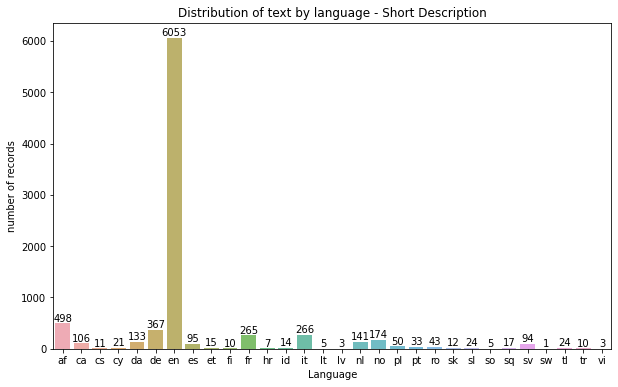

In [ ]:
x = data1["languageShort"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language - Short Description")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


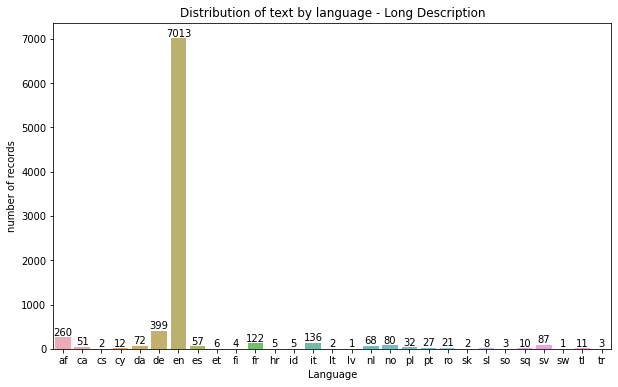

In [ ]:
x = data1["languageLong"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language - Long Description")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
#pip install googletrans
#pip install langdetect
!pip install googletrans==3.1.0a0

In [ ]:
#Language Translation
#import googletrans
from googletrans import Translator


In [ ]:
#Translate the text to English
# Function to translate the text to english.
def fn_translate(df,lang):
    try:
        if lang == 'en':
            return df
        else:
            print(df)
            return translator.translate(df).text
    except:
        return df 

In [ ]:
data1['newDescription'] = data1.apply(lambda x: fn_translate(x['newDescription'], x['language']), axis=1)

skype error  skype error 
unable to open payslips  unable to open payslips 
unable to sign into vpn unable to sign into vpn
unable to connect to vpn unable to connect to vpn
erp SID_37 password reset  erp SID_37 password reset 
unable to log in to erp SID_34  unable to log in to erp SID_34 
unable to login to hr_tool etime unable to login to hr_tool etime
i need my password_management_tool password manager password reset.


  vip 2 - i need my password_management_tool password manager password reset.
unable to open ie  unable to open ie 
unable to display expense report unable to display expense report
unable to access mails  unable to access mails 
unable to display expense report unable to display expense report
update on inplant_874269 update on inplant_874269
unable to access vpn unable to access vpn
install driver in printer hr14 in HostName_769 install driver in printer hr14 in HostName_769
please reset hr_tool gv4536 password reset.  prtgghj4k45 password reset
qifzkoej etbmgjvo 

In [ ]:
data1.head()

,Short description,Description,Caller,Assignment group,newDescription,language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,en
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,en
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no


In [ ]:
"""
Detect and remove the rows in the data that have NaN values for newDescription
"""
def descDropRow(data):
  data = data[data['newDescription'].notna()]
  return data

In [ ]:
data1 = descDropRow(data1)

In [ ]:
data1.shape

(8491, 6)

In [ ]:
"""
Find the mean of the number of words across different Assignment groups
Use boxplot to represent the data 
"""
text_len=data1['newDescription'].str.split().map(lambda x: len(str(x).split(" ")))
data1['text_len']=text_len

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   Assignment group   text_len
                          mean
0             GRP_0  23.940746
1             GRP_1  37.645161
2            GRP_10  34.707143
3            GRP_11  53.000000
4            GRP_12  47.634241
..              ...        ...
69           GRP_71  48.000000
70           GRP_72   8.000000
71           GRP_73  59.000000
72            GRP_8  47.503782
73            GRP_9  28.293651

[74 rows x 2 columns]

The maximum number of words in the dataset is =  1639
The minimum number of words in the dataset is =  2
The average number of words in the dataset is =  34
The median of number of words in the dataset is =  19
50% of the dataset have number of words that lies between  12 and 36



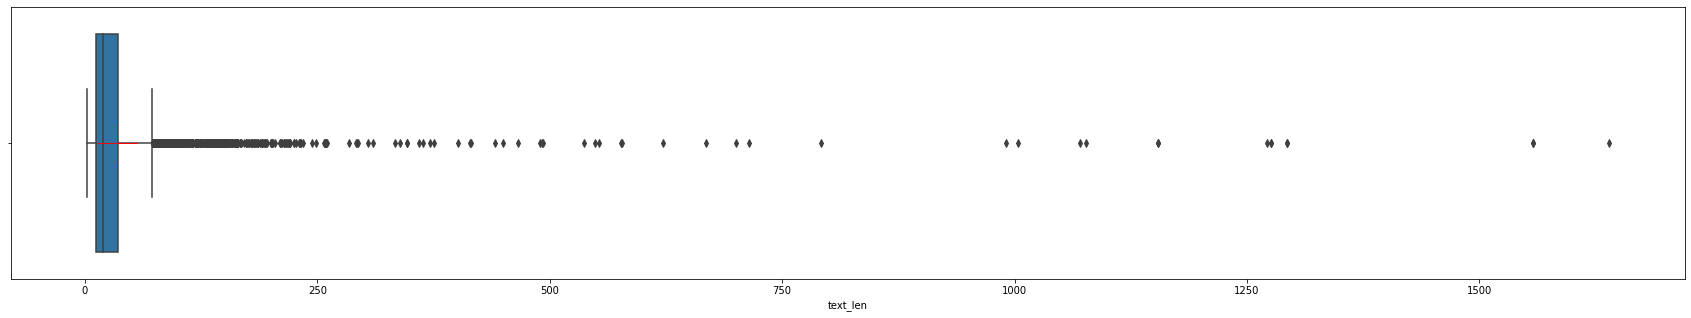

In [ ]:
plt.figure(figsize=(30,5));
sns.boxplot(data1['text_len'],showmeans=True,meanprops={"marker": "+",
                      "markeredgecolor": "red",
                       "markersize": "40"});

print(data1.groupby(['Assignment group']).agg(['mean']).reset_index())
print()
print("The maximum number of words in the dataset is = ",data1['text_len'].max())
print("The minimum number of words in the dataset is = ",data1['text_len'].min())
print("The average number of words in the dataset is = ",round(data1['text_len'].mean()))
print("The median of number of words in the dataset is = ",round(data1['text_len'].median()))

from scipy.stats import iqr
Q1 = np.percentile(data1['text_len'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data1['text_len'], 75, interpolation = 'midpoint')
print("50% of the dataset have number of words that lies between ",round(Q1),"and",round(Q3))
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


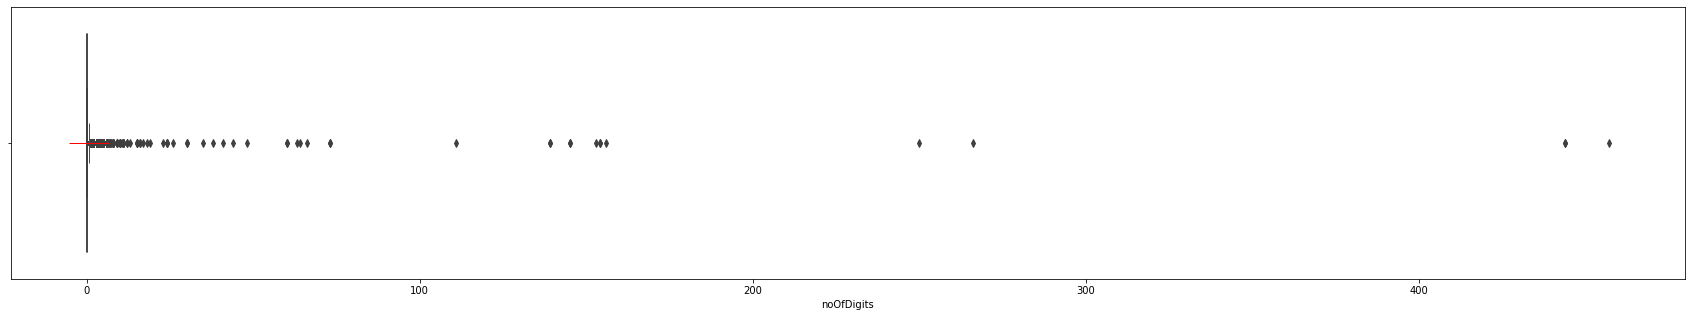

In [ ]:
data1["noOfDigits"] = data1["newDescription"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
plt.figure(figsize=(30,5));
sns.boxplot(data1['noOfDigits'],showmeans=True,meanprops={"marker": "+",
                      "markeredgecolor": "red",
                       "markersize": "40"});

The new dataset has only one column as independent variable (here it is newDescription)

In [ ]:
"""
Function to delete duplicates; the first occurrence is kept and the rest of the duplicates are deleted.
"""

data1.drop_duplicates(inplace=True)
data1.shape

(8409, 7)

The number of rows have further reduced from 8488 to 7899; 589 duplicates were found and deleted from the dataset

In [ ]:
 #Reset Index; to rearrange the index
 data1= data1.reset_index(drop=True)  

In [ ]:
data1.tail()

,Short description,Description,Caller,Assignment group,newDescription,language,text_len
8404,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,en,26
8405,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue,en,4
8406,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,en,14
8407,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,i am unable to access the machine utilities to...,en,21
8408,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,an mehreren pc`s lassen sich verschiedene prgr...,de,20


In [ ]:
"""
Word Cloud to visualize the words in the newDescription
"""
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the description column 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

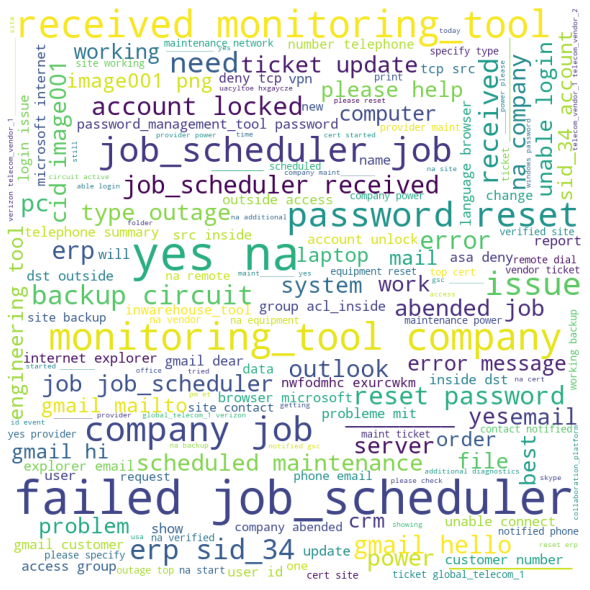

In [ ]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(data1.newDescription)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

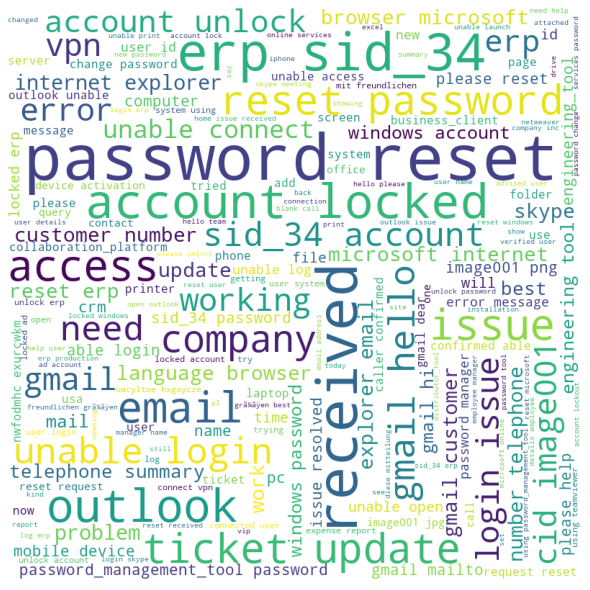

In [ ]:
# Word Cloud for the GRP_0 (which is ~50% of the data talks about)
wordcloud = f_word_cloud(data1[data1['Assignment group']=='GRP_0'].newDescription)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Section4 : Description Column - Text cleaning**<br>

---


This section contains functions that will clean the description data, removing unwanted information (junk, numbers, special characters, group together invariant form of words, translate foreign language with English, remove common words (stop words), etc..
1. Language translation
1. Email address 
3. Caller Names remove from description
2. words with ":" like name:  , address:  , from:
3. Special Characters
5. Extra spaces
6. Stop word
7. Lemmatization
8. html
9. duplicate records
10.duplicate words within a record


In [ ]:
data1.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group',
       'newDescription', 'language', 'text_len'],
      dtype='object')

In [ ]:
"""
Remove HTML tags using beautiful soup
Parsing the description as a string into the BeautifulSoup and this will strip the text off html characters
"""
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [ ]:
for desc in range(len(data1['Assignment group'])):
  text = data1['newDescription'][desc]
  stripped_text = strip_html_tags(text)
  data1['newDescription'].iloc[desc]= stripped_text 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
 data1['newDescription']

0       -verified user details.(employee# & manager na...
1       \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...
2       \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...
3       unable to access hr_tool page unable to access...
4                               skype error  skype error 
                              ...                        
8404    \n\nreceived from: avglmrts.vhqmtiua@gmail.com...
8405    telephony_software issue telephony_software issue
8406    vip2: windows password reset for tifpdchb pedx...
8407    i am unable to access the machine utilities to...
8408    an mehreren pc`s lassen sich verschiedene prgr...
Name: newDescription, Length: 8409, dtype: object

In [ ]:
"""
Description text is converted to lower case using the .lower() function
"""
def lower_text(text):
  lowertext = text.lower()
  return lowertext

In [ ]:
for desc in range(len(data1['Assignment group'])):
  text = data1['newDescription'][desc]
  new_text = lower_text(text)
  data1['newDescription'].iloc[desc]= new_text 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
"""
Contractions words found in the description
using find and replace function to change the contraction words
"""
def contract_text(text):
    text=text.replace("ain't","am not / are not / is not / has not / have not")
    text=text.replace("aren't","are not / am not")
    text=text.replace("can't","cannot")
    text=text.replace("can't've","cannot have")
    text=text.replace("'cause","because")
    text=text.replace("could've","could have")
    text=text.replace("couldn't","could not")
    text=text.replace("couldn't've","could not have")
    text=text.replace("didn't","did not")
    text=text.replace("doesn't","does not")
    text=text.replace("don't","do not")
    text=text.replace("hadn't","had not")
    text=text.replace("hadn't've","had not have")
    text=text.replace("hasn't","has not")
    text=text.replace("haven't","have not")
    text=text.replace("he'd","he had / he would")
    text=text.replace("he'd've","he would have")
    text=text.replace("he'll","he shall / he will")
    text=text.replace("he'll've","he shall have / he will have")
    text=text.replace("he's","he has / he is")
    text=text.replace("how'd","how did")
    text=text.replace("how'd'y","how do you")
    text=text.replace("how'll","how will")
    text=text.replace("how's","how has / how is / how does")
    text=text.replace("I'd","I had / I would")
    text=text.replace("I'd've","I would have")
    text=text.replace("I'll","I shall / I will")
    text=text.replace("I'll've","I shall have / I will have")
    text=text.replace("I'm","I am")
    text=text.replace("I've","I have")
    text=text.replace("isn't","is not")
    text=text.replace("it'd","it had / it would")
    text=text.replace("it'd've","it would have")
    text=text.replace("it'll","it shall / it will")
    text=text.replace("it'll've","it shall have / it will have")
    text=text.replace("it's","it has / it is")
    text=text.replace("let's","let us")
    text=text.replace("ma'am","madam")
    text=text.replace("mayn't","may not")
    text=text.replace("might've","might have")
    text=text.replace("mightn't","might not")
    text=text.replace("mightn't've","might not have")
    text=text.replace("must've","must have")
    text=text.replace("mustn't","must not")
    text=text.replace("mustn't've","must not have")
    text=text.replace("needn't","need not")
    text=text.replace("needn't've","need not have")
    text=text.replace("o'clock","of the clock")
    text=text.replace("oughtn't","ought not")
    text=text.replace("oughtn't've","ought not have")
    text=text.replace("shan't","shall not")
    text=text.replace("sha'n't","shall not")
    text=text.replace("shan't've","shall not have")
    text=text.replace("she'd","she had / she would")
    text=text.replace("she'd've","she would have")
    text=text.replace("she'll","she shall / she will")
    text=text.replace("she'll've","she shall have / she will have")
    text=text.replace("she's","she has / she is")
    text=text.replace("should've","should have")
    text=text.replace("shouldn't","should not")
    text=text.replace("shouldn't've","should not have")
    text=text.replace("so've","so have")
    text=text.replace("so's","so as / so is")
    text=text.replace("that'd","that would / that had")
    text=text.replace("that'd've","that would have")
    text=text.replace("that's","that has / that is")
    text=text.replace("there'd","there had / there would")
    text=text.replace("there'd've","there would have")
    text=text.replace("there's","there has / there is")
    text=text.replace("they'd","they had / they would")
    text=text.replace("they'd've","they would have")
    text=text.replace("they'll","they shall / they will")
    text=text.replace("they'll've","they shall have / they will have")
    text=text.replace("they're","they are")
    text=text.replace("they've","they have")
    text=text.replace("to've","to have")
    text=text.replace("wasn't","was not")
    text=text.replace("we'd","we had / we would")
    text=text.replace("we'd've","we would have")
    text=text.replace("we'll","we will")
    text=text.replace("we'll've","we will have")
    text=text.replace("we're","we are")
    text=text.replace("we've","we have")
    text=text.replace("weren't","were not")
    text=text.replace("what'll","what shall / what will")
    text=text.replace("what'll've","what shall have / what will have")
    text=text.replace("what're","what are")
    text=text.replace("what's","what has / what is")
    text=text.replace("what've","what have")
    text=text.replace("when's","when has / when is")
    text=text.replace("when've","when have")
    text=text.replace("where'd","where did")
    text=text.replace("where's","where has / where is")
    text=text.replace("where've","where have")
    text=text.replace("who'll","who shall / who will")
    text=text.replace("who'll've","who shall have / who will have")
    text=text.replace("who's","who has / who is")
    text=text.replace("who've","who have")
    text=text.replace("why's","why has / why is")
    text=text.replace("why've","why have")
    text=text.replace("will've","will have")
    text=text.replace("won't","will not")
    text=text.replace("won't've","will not have")
    text=text.replace("would've","would have")
    text=text.replace("wouldn't","would not")
    text=text.replace("wouldn't've","would not have")
    text=text.replace("y'all","you all")
    text=text.replace("y'all'd","you all would")
    text=text.replace("y'all'd've","you all would have")
    text=text.replace("y'all're","you all are")
    text=text.replace("y'all've","you all have")
    text=text.replace("you'd","you had / you would")
    text=text.replace("you'd've","you would have")
    text=text.replace("you'll","you shall / you will")
    text=text.replace("you'll've","you shall have / you will have")
    text=text.replace("you're","you are")
    text=text.replace("you've","you have")
   
    return text


In [ ]:
for desc in range(len(data1['Assignment group'])):
  text = data1['newDescription'][desc]
  new_text = contract_text(text)
  data1['newDescription'].iloc[desc]= new_text 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [3]:
"""
Using regular expression and find replace functions to clean the description

"""
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'') 
    text = re.sub(r'\S*@\S*\s?', '', text) #remove email    
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi ', '')
    text=text.replace('sir', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('kindly', '')
    text=text.replace('yes', '')
    text=text.replace('no ', '')
    text=text.replace(' able ', '')
    text=text.replace('cannot', '')
    text=text.replace('regards', '')
    text=text.replace('dear', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('pls', '')
    text=text.replace('regards', '')
    text=text.replace('please contact', '')
    text=text.replace('i am', '')
    text=text.replace('help', '')
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'\w+(?=\s+:)', ' ', text) # remove word before : sign
    text = re.sub(r'\w+(?=\:)', ' ', text) # remove word before : sign
    text = re.sub(r'^a-zA-z0-9\s', ' ', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\r\n', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'\S+.com', ' ',text)
    text = re.sub(r'\b\w{1,2}\b', '',text)  #drop words with less than 3 characters
    text = text.lower()
    return text

In [ ]:
for desc in range(len(data1['Assignment group'])):
  text = data1['newDescription'][desc]
  new_text = clean_text(text)
  data1['newDescription'].iloc[desc]= new_text 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data1['newDescription']

0        verified user details  employee    manager na...
1            team    meetings skype meetings etc are n...
2                             log   vpn    cant log   vpn
3       unable  access  tool page unable  access  tool...
4                               skype error  skype error 
                              ...                        
8404        good afternoon   not receiving the emails ...
8405    telephony software issue telephony software issue
8406       windows password reset for tifpdchb pedxruy...
8407     unable  access the machine utilities  finish ...
8408     mehreren   lassen sich verschiedene prgramdnt...
Name: newDescription, Length: 8409, dtype: object

In [ ]:
"""
Remove extra white space using regular expressions
"""
def whitesp(text):
  pattern = r'[' +',' ']'
  text = re.sub(pattern, '', text)
  return text

In [ ]:
for desc in range(len(data1['Assignment group'])):
  text = data1['newDescription'][desc]
  wo_whitesp = whitesp(text)
  data1['newDescription'].iloc[desc]= wo_whitesp 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Cleaning the Caller Names from the description

In [ ]:
"""
Caller names found in the description, the code is used to remove the caller names from description
Split the Caller Names into two columns - first and last name
Find and replace the first and last names in the description with space
"""
for desc in range(len(data1['Assignment group'])):
  text = data1['Caller'][desc]
  wo_whitesp = whitesp(text)
  data1['Caller'].iloc[desc]= wo_whitesp 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data1 = data1.join(data1['Caller'].str.split(' ', 1, expand=True).rename(columns={0:'CallerFirst', 1:'CallerLast'}))

In [ ]:
data1.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group',
       'newDescription', 'language', 'text_len', 'CallerFirst', 'CallerLast'],
      dtype='object')

In [ ]:
# Caller Name replace with blank space in description section
def callerNameReplace(data):
  for desc in range(len(data['Assignment group'])):
    text1 = str(data['newDescription'][desc])
    text2 = str(data['CallerFirst'][desc])
    text3 = str(data['CallerLast'][desc])
    replaceDesc1 = text1.replace(text2," ")
    replaceDesc2 = replaceDesc1.replace(text3," ")
    data['newDescription'].iloc[desc] = replaceDesc2  

In [ ]:
callerNameReplace(data1)   

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
"""
Stop words removal
Import the stopwords from the nltk corpus, remove the stopwords from description

"""
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data1['newDescription'] = data1['newDescription'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
data1['newDescription'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    verified user details employee manager name ch...
1    team meetings skype meetings etc appearing out...
2                                 log vpn cant log vpn
3      unable access tool page unable access tool page
4                              skype error skype error
Name: newDescription, dtype: object

In [ ]:
"""
Lemmatization
Grouping together the inflected forms of a word so they can be analysed as a single item
"""
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()]) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
for desc in range(len(data1['Assignment group'])):
  text = data1['newDescription'][desc]
  lemma = lemmatize_text(text)
  data1['newDescription'].iloc[desc]= lemma 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
"""
Remove white spaces using regular expressions
"""
def whitesp(text):
  pattern = r'[' +',' ']'
  text = re.sub(pattern, '', text)
  return text

In [ ]:
for desc in range(len(data1['Assignment group'])):
  text = data1['newDescription'][desc]
  wo_whitesp = whitesp(text)
  data1['newDescription'].iloc[desc]= wo_whitesp 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
## Lemmatization
import nltk
#nltk.download('wordnet')

from textblob import Word
data1['newDescription']= data1['newDescription'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
data1['newDescription'].head()



0    verified user detail employee manager name che...
1    team meeting skype meeting etc appearing outlo...
2                                 log vpn cant log vpn
3      unable access tool page unable access tool page
4                              skype error skype error
Name: newDescription, dtype: object

In [ ]:
# Replace blank cells with nan
descReplaceNan(data1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1.isna().sum()

Short description      0
Description            0
Caller                 0
Assignment group       0
newDescription       188
language               0
text_len               0
CallerFirst            0
CallerLast             0
dtype: int64

In [ ]:
#drop rows with nan
data1 = descDropRow(data1)

In [ ]:
data1.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
newDescription       0
language             0
text_len             0
CallerFirst          0
CallerLast           0
dtype: int64

In [ ]:
# Remove the Short Description & Description and Caller  and other calculated column from the dataframe
dataPrep = data1[['newDescription','Assignment group']]

In [ ]:
dataPrep.shape

(8221, 2)

In [ ]:
#find duplicates
dataPrep[dataPrep.duplicated()].value_counts()


newDescription                                                         Assignment group
job failed job scheduler job failed job scheduler                      GRP_8               307
                                                                       GRP_9               134
ticket update ticket update                                            GRP_0               130
job failed job scheduler job failed job scheduler                      GRP_6                82
                                                                       GRP_5                79
                                                                                          ... 
reset erp password reset erp password                                  GRP_0                 1
reinstall reinstall                                                    GRP_24                1
received reporting tool alert connected connected connected connected  GRP_8                 1
qlhmawgi sgwipoxn locked qlhmawgi sgwipoxn locked        

In [ ]:
dataPrep.shape

(8221, 2)

In [ ]:
dataPrep.columns

Index(['newDescription', 'Assignment group'], dtype='object')

In [ ]:
dataPrep['num_words'] = dataPrep['newDescription'].apply(lambda x: len(x.split()))
print(dataPrep['num_words'].max())
print(dataPrep['num_words'].min())

625
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataPrep = dataPrep[dataPrep['num_words']>1] #drop the rows that have <2 words 

In [ ]:
wd_counts = Counter()
for i, row in data1.iterrows():
    wd_counts.update(row['newDescription'].split())
    
wd_counts.most_common(100)

[('job', 3518),
 ('password', 2365),
 ('erp', 2014),
 ('failed', 1653),
 ('tool', 1643),
 ('scheduler', 1563),
 ('unable', 1474),
 ('user', 1451),
 ('reset', 1361),
 ('access', 1333),
 ('issue', 1300),
 ('account', 1223),
 ('ticket', 1000),
 ('error', 933),
 ('outlook', 889),
 ('need', 885),
 ('login', 825),
 ('working', 819),
 ('site', 811),
 ('system', 764),
 ('email', 756),
 ('circuit', 697),
 ('power', 680),
 ('network', 667),
 ('company', 613),
 ('locked', 612),
 ('update', 586),
 ('pany', 546),
 ('window', 516),
 ('event', 501),
 ('backup', 500),
 ('engineering', 493),
 ('new', 491),
 ('server', 487),
 ('skype', 484),
 ('printer', 474),
 ('vpn', 473),
 ('crm', 465),
 ('usa', 454),
 ('see', 451),
 ('phone', 441),
 ('problem', 427),
 ('log', 417),
 ('customer', 414),
 ('order', 413),
 ('message', 410),
 ('change', 409),
 ('open', 408),
 ('get', 392),
 ('since', 392),
 ('type', 389),
 ('device', 381),
 ('call', 370),
 ('team', 362),
 ('mit', 359),
 ('connect', 357),
 ('time', 354),


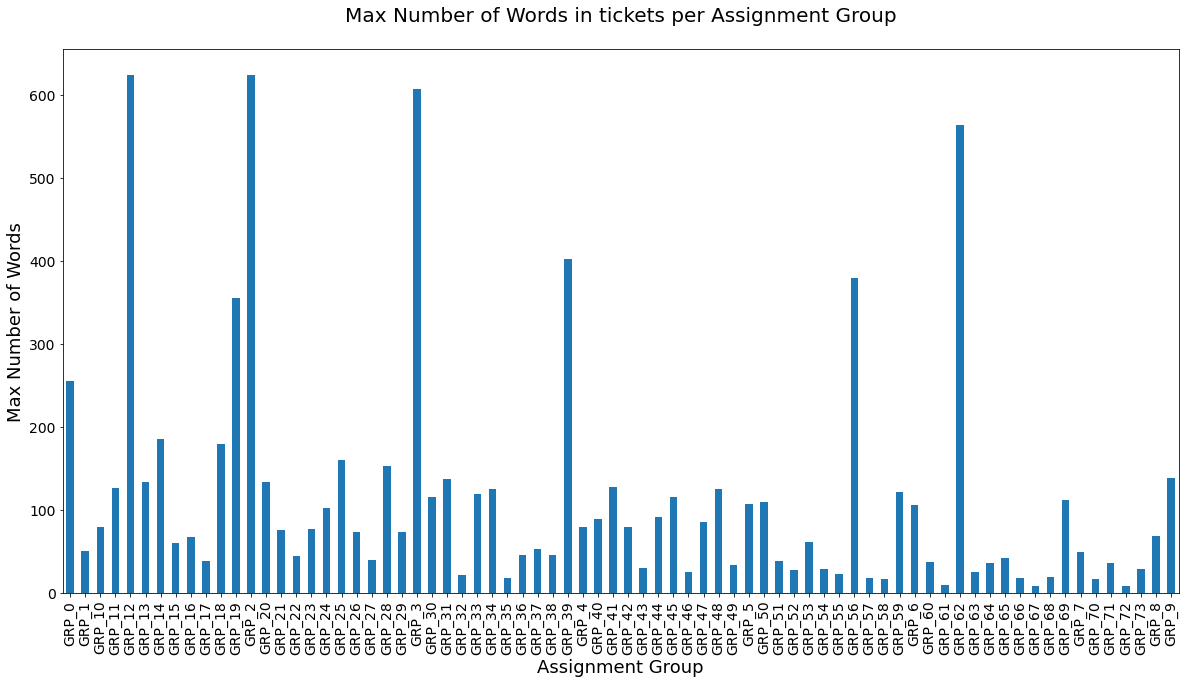

In [ ]:
assign_grps = dataPrep.groupby('Assignment group')
ax=assign_grps['num_words'].aggregate(np.max).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Max Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Max Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

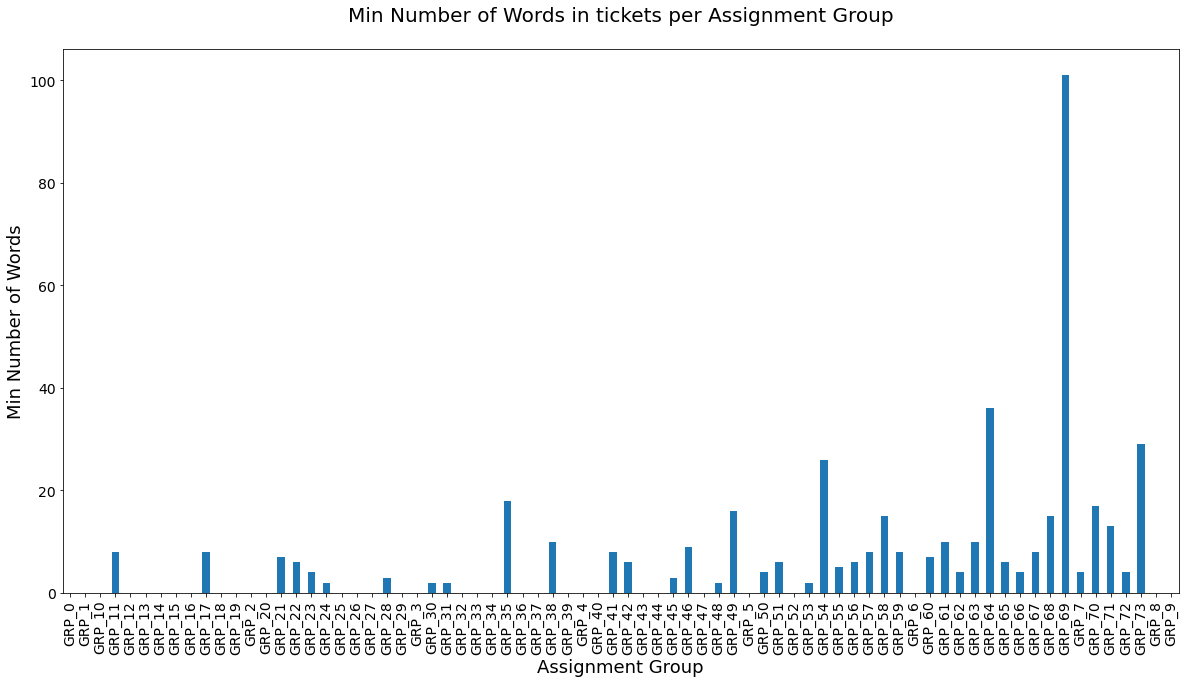

In [ ]:
assign_grps = dataPrep.groupby('Assignment group')
ax=assign_grps['num_words'].aggregate(np.min).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Min Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Min Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

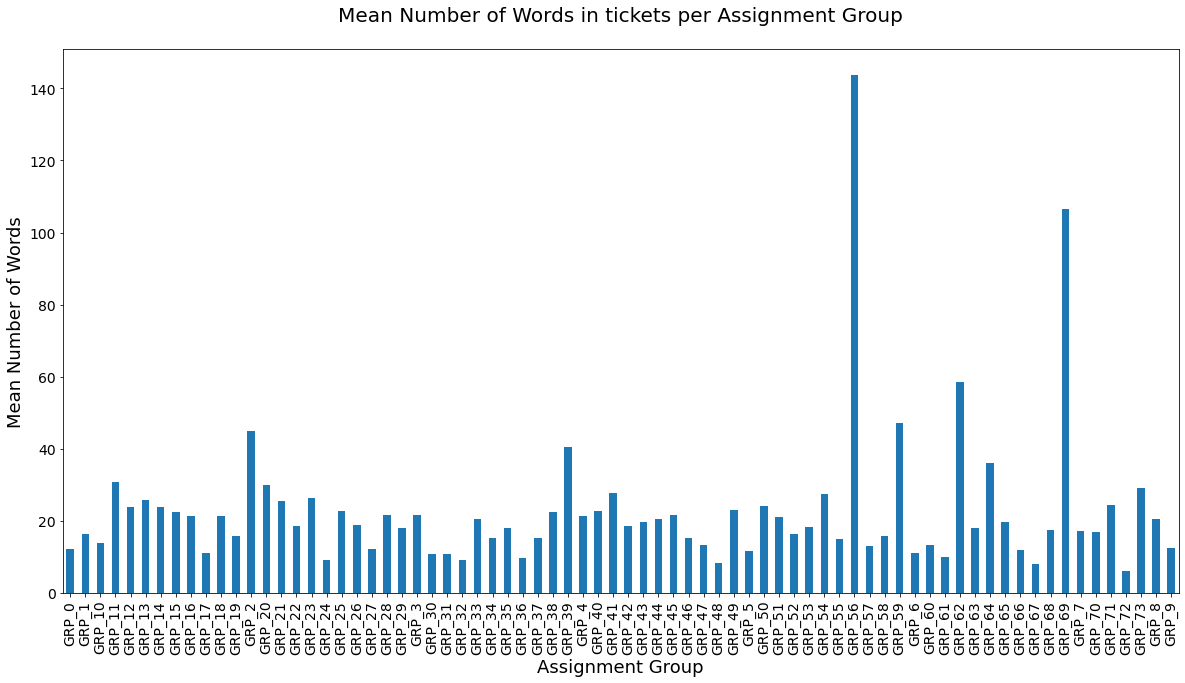

In [ ]:
assign_grps = dataPrep.groupby('Assignment group')
ax=assign_grps['num_words'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

In [ ]:
dataPrep.head()

,newDescription,Assignment group,num_words
0,verified user detail employee manager name che...,GRP_0,23
1,team meeting skype meeting etc appearing outlo...,GRP_0,12
2,log vpn cant log vpn,GRP_0,5
3,unable access tool page unable access tool page,GRP_0,8
4,skype error skype error,GRP_0,4


In [ ]:
dataPrep[dataPrep['num_words']>600]

,newDescription,Assignment group,num_words
5043,source source destination user sep sm field sa...,GRP_3,608
7895,source system santiago south amerirtca backup ...,GRP_2,625
7897,source system santiago south amerirtca backup ...,GRP_12,625


In [ ]:
dataPrep[dataPrep['num_words']<2]  # rows of data which have only one word, can be dropped ~189 rows

,newDescription,Assignment group,num_words


In [ ]:
dataPrep = dataPrep[['newDescription','Assignment group']]

In [ ]:
dataPrep

,newDescription,Assignment group
0,verified user detail employee manager name che...,GRP_0
1,team meeting skype meeting etc appearing outlo...,GRP_0
2,log vpn cant log vpn,GRP_0
3,unable access tool page unable access tool page,GRP_0
4,skype error skype error,GRP_0
...,...,...
8404,good afternoon receiving email sent mail advis...,GRP_29
8405,telephony software issue telephony software issue,GRP_0
8406,window password reset tifpdchb pedxruyf window...,GRP_0
8407,unable access machine utility finish drawer ad...,GRP_62


In [ ]:
"""
Duplicates found in decription
duplicate function cannot be used to remove the duplicates as this goes with first occurence.
Instead, create a user defined function which does a frequency distribution of the duplicates 
across the groups and retains the description for a agroup which has the maximum frequency or mode of 
that description
"""
dataPrep[dataPrep.duplicated()].value_counts()


newDescription                                                         Assignment group
job failed job scheduler job failed job scheduler                      GRP_8               307
                                                                       GRP_9               134
ticket update ticket update                                            GRP_0               130
job failed job scheduler job failed job scheduler                      GRP_6                82
                                                                       GRP_5                79
                                                                                          ... 
reset erp password reset erp password                                  GRP_0                 1
reinstall reinstall                                                    GRP_24                1
received reporting tool alert connected connected connected connected  GRP_8                 1
qlhmawgi sgwipoxn locked qlhmawgi sgwipoxn locked        

In [ ]:
len(dataPrep[dataPrep.duplicated()]) # number of duplicate rows

1868

In [ ]:
# unique descriptions taken from the list of duplicated
uniqueDuplicates = dataPrep['newDescription'][dataPrep.duplicated()].unique()
# Finding the group which has the maximum frequency of a unique description 
dataF = pd.DataFrame()
dataF['newDescription'] = uniqueDuplicates
grpMax =[]
for uniqueDesc in uniqueDuplicates:
  exists = dataPrep['newDescription'].str.contains(uniqueDesc).any()
  if exists:
    newdf = dataPrep[dataPrep.newDescription == uniqueDesc]
    max = newdf['Assignment group'].mode()
    grpMax.append(max[0])   
dataF['Assignment group']=grpMax
 

In [ ]:
dataF

,newDescription,Assignment group
0,ticket update ticket update,GRP_0
1,employment status new non employee employment ...,GRP_0
2,job failed job scheduler job failed job scheduler,GRP_8
3,erp account locked erp account locked,GRP_0
4,unable display expense report unable display e...,GRP_0
...,...,...
246,need password reset need password reset,GRP_0
247,blank call loud noise blank call loud noise,GRP_0
248,qlhmawgi sgwipoxn locked qlhmawgi sgwipoxn locked,GRP_0
249,supply chain software password reset supply ch...,GRP_0


In [ ]:
# delete all rows that contain duplicate descriptions
dataPrep = dataPrep[~dataPrep['newDescription'].isin(uniqueDuplicates)]


In [ ]:
dataPrep.shape

(6049, 2)

In [ ]:
#Insert the rows back with unique description to the dataset
dataProcessed = pd.concat([dataPrep, dataF], axis=0)

In [ ]:
dataProcessed.reset_index(drop=True)

,newDescription,Assignment group
0,verified user detail employee manager name che...,GRP_0
1,team meeting skype meeting etc appearing outlo...,GRP_0
2,log vpn cant log vpn,GRP_0
3,unable access tool page unable access tool page,GRP_0
4,unable log engineering tool skype unable log e...,GRP_0
...,...,...
6295,need password reset need password reset,GRP_0
6296,blank call loud noise blank call loud noise,GRP_0
6297,qlhmawgi sgwipoxn locked qlhmawgi sgwipoxn locked,GRP_0
6298,supply chain software password reset supply ch...,GRP_0


In [ ]:
dataProcessed.shape

(6300, 2)

In [ ]:
dataProcessed.reset_index(drop=True, inplace=True)

In [ ]:
"""
Words duplicates in one description

While concatenating the short and long descriptions in the earlier steps, 
the words within the new description were containing duplicates , the blow function
is used to remove the repetitions of words within a description
"""

def removeRepeats(myText):
    l = myText.split()
    temp = []
    for x in l:
        if x not in temp:
            temp.append(x)
    return ' '.join(temp)


390                 probleme mit etiketten drucken laser
392    154 unable login window reset password telepho...
393                                      volume consumed
394    configure calendar phone sync outlook configur...
396    unable find shortcut erp unable find shortcut erp
397    tool app sso page open beshryu screen open pay...
Name: newDescription, dtype: object

In [ ]:
for desc in range(len(dataProcessed['Assignment group'])):
  text = dataProcessed['newDescription'][desc]
  newText = removeRepeats(str(text))
  dataProcessed['newDescription'].iloc[desc]= newText

DATA CLEANSING COMPLETED

In [ ]:
# Cleaned data saved to drive
dataProcessed.to_csv(project_path+'CleanedData.csv', index=False)

In [2]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = "CleanedData.csv"
CleanedData = pd.read_csv(f"{project_path}{filename}")


**Model Development**

In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
"""
Include groups that have more than 100 records and others are not considered for model development
Split the data into x and y 
Label encode the y 
Split the data into train and test
Initialise the max features = 10000
Saving model train and test scores into a list
"""

dataProcessed = CleanedData[CleanedData['Assignment group'].map(CleanedData['Assignment group'].value_counts())>100]
x = dataProcessed['newDescription']
y = dataProcessed['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)

max_features=10000

log_cols=["Classifier", "train_accuracy","train_f1_score", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)

In [5]:
"""
Decoding the encoded y classes for interpretation of the results using python dictionary
"""

# Dictionary of group names as key and encoded values as values of dictionary
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)
print()

# list out keys and values separately
grp_list = list(le_name_mapping.keys())
grpval_list = list(le_name_mapping.values())
 
# print key with val 4
position = grpval_list.index(4)
print(grp_list[position])
 
# mapping the prediction with the group name
def pred_mapping(num):
  predictedGroup = list(le_name_mapping.keys())[list(le_name_mapping.values()).index(num)]
  print(predictedGroup)


{'GRP_0': 0, 'GRP_12': 1, 'GRP_13': 2, 'GRP_14': 3, 'GRP_19': 4, 'GRP_2': 5, 'GRP_24': 6, 'GRP_25': 7, 'GRP_3': 8, 'GRP_33': 9, 'GRP_8': 10}

GRP_19


In [ ]:
le_name_mapping

{'GRP_0': 0,
 'GRP_12': 1,
 'GRP_13': 2,
 'GRP_14': 3,
 'GRP_19': 4,
 'GRP_2': 5,
 'GRP_24': 6,
 'GRP_25': 7,
 'GRP_3': 8,
 'GRP_33': 9,
 'GRP_8': 10}

In [6]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'le_name_mapping.pkl'
pickle.dump(le_name_mapping, open(project_path+filename, 'wb'))

Support Vector Machine for multi classification

In [7]:
"""
MODEL1
Support Vector Model using n_gram (1,1)
Pipeline the tfidf, SVC model 
Train the model on train dataset
"""
##Approach#1 - n_gram =(1,1)
from sklearn.feature_extraction.text import TfidfVectorizer
svm = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features)),
               ('clf', SVC(probability=True,kernel='rbf', C=3,gamma=0.099)),
              ])
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

In [ ]:
"""
Accuracy, f1_score, confusion matrix, precision, recall scores
"""
y_pred_train = svm.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = svm.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SVC",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.7837837837837838
train f1 score 0.8324411098509058

accuracy 0.7313746065057712
f1 score 0.8031029413012807
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       596
           1       0.57      0.27      0.37        44
           2       1.00      0.19      0.31        27
           3       0.86      0.27      0.41        22
           4       0.00      0.00      0.00        41
           5       0.73      0.18      0.29        45
           6       0.74      0.67      0.71        43
           7       0.00      0.00      0.00        23
           8       1.00      0.03      0.05        39
           9       1.00      0.24      0.38        21
          10       0.93      0.81      0.87        52

    accuracy                           0.73       953
   macro avg       0.69      0.33      0.38       953
weighted avg       0.71      0.73      0.66       953

[[589   2   0   0   0   0   3   0   0   0   2]
 [ 29  12   0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svm.sav'
pickle.dump(svm, open(project_path+filename, 'wb'))

In [ ]:
"""
MODEL2
Support Vector Model using n_gram (1,2)
Pipeline the tfidf, SVC model 
Train the model on train dataset

"""

##Approach#2 - n-gram =(1,2)
from sklearn.feature_extraction.text import TfidfVectorizer
svm_ng2 = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features,ngram_range =(1,2))),
               ('clf', SVC(probability=True,kernel='rbf', C=3,gamma=0.099)),
              ])
svm_ng2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

In [ ]:
y_pred_train = svm_ng2.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = svm_ng2.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SVC_ngram12",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.7924429283652584
train f1 score 0.836485496583072

accuracy 0.7303252885624344
f1 score 0.8014744245783231
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       596
           1       0.59      0.30      0.39        44
           2       1.00      0.22      0.36        27
           3       0.86      0.27      0.41        22
           4       0.00      0.00      0.00        41
           5       0.73      0.18      0.29        45
           6       0.74      0.65      0.69        43
           7       0.00      0.00      0.00        23
           8       1.00      0.03      0.05        39
           9       0.80      0.19      0.31        21
          10       0.93      0.79      0.85        52

    accuracy                           0.73       953
   macro avg       0.67      0.33      0.38       953
weighted avg       0.70      0.73      0.66       953

[[589   2   0   0   0   0   3   0   0   0   2]
 [ 29  13   0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svm_ng2.sav'
pickle.dump(svm_ng2, open(project_path+filename, 'wb'))

In [22]:
"""
MODEL3
Support Vector Model using n_gram (1,2) and balancing the data using SMOTE
tfidf, SVC model 
Train the model on train dataset

"""
#Approach#3 - Balance the data  , retain all Groups with >100 records
tvect = TfidfVectorizer(ngram_range=(1,2), max_features=max_features)
tvect.fit(X_train)
trainX_tfidf = tvect.transform(X_train)
tvect.fit(X_test)
testX_tfidf = tvect.transform(X_test)

smote = SMOTE(random_state=777,k_neighbors=5)
X_smote,y_smote = smote.fit_sample(trainX_tfidf, y_train)
smote = SMOTE(random_state=777,k_neighbors=5)
X_test_smote,y_test_smote = smote.fit_sample(testX_tfidf, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
svc_smote = SVC(kernel='rbf', C=10, gamma=0.1,decision_function_shape='ovr')
svc_smote.fit(X_smote,y_smote)
y_train_pred = svc_smote.predict(X_smote)
y_test_pred  = svc_smote.predict(testX_tfidf)
print("Train dataset")
print(classification_report(y_smote,y_train_pred))
print(confusion_matrix(y_smote,y_train_pred))
print()
print()
print("Test Dataset")
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

Train dataset
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2383
           1       1.00      1.00      1.00      2383
           2       1.00      1.00      1.00      2383
           3       1.00      1.00      1.00      2383
           4       1.00      1.00      1.00      2383
           5       0.99      1.00      0.99      2383
           6       0.99      1.00      0.99      2383
           7       1.00      1.00      1.00      2383
           8       1.00      1.00      1.00      2383
           9       1.00      1.00      1.00      2383
          10       1.00      1.00      1.00      2383

    accuracy                           1.00     26213
   macro avg       1.00      1.00      1.00     26213
weighted avg       1.00      1.00      1.00     26213

[[2332    5    1    2    5   13   11    1    7    3    3]
 [   0 2374    0    0    0    9    0    0    0    0    0]
 [   0    0 2383    0    0    0    0    0    0    0    0]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svc_smote.sav'
filename2 = 'svc_smote_tvect.sav'
pickle.dump(svc_smote, open(project_path+filename, 'wb'))
pickle.dump(tvect, open(project_path+filename2, 'wb'))

Random Forest Classifier

In [ ]:
#grid search for Random Forest
rfc = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features)),
               ('clf', RandomForestClassifier()),
              ])

# Declare a hyperparameter grid
param_grid = {
    "clf__n_estimators": [100, 500, 1000],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__max_features": [*np.arange(0.1, 1.1, 0.1)],
}

# Perform grid search, fit it, and print score
gs = GridSearchCV(rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1000)
gs.fit(X_train, y_train)


Fitting 3 folds for each of 120 candidates, totalling 360 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

TypeError: ignored

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features=0.8,
                                        max_leaf_nodes=None, max_samples=None,
   

In [ ]:
"""
MODEL4
Random Forest using n_gram (1,1)
Pipeline the tfidf, RF model 
Train the model on train dataset

"""
#n_gram=(1,1)
from sklearn.feature_extraction.text import TfidfVectorizer
rfc = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features)),
               ('clf', RandomForestClassifier(criterion='gini',max_depth=25, random_state=0, n_estimators = 500,min_samples_leaf=1, min_samples_split=2, max_features=0.8)),
              ])
rfc.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern=...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features=0.8,
                                        max_leaf_nodes=None, max_samples=None,
   

In [ ]:
y_pred_train = rfc.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = rfc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["RandomF",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.8344266596693781
train f1 score 0.8532809656177002

accuracy 0.7250786988457503
f1 score 0.7738773146146588
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       596
           1       0.53      0.36      0.43        44
           2       0.78      0.26      0.39        27
           3       0.67      0.27      0.39        22
           4       0.33      0.15      0.20        41
           5       0.71      0.22      0.34        45
           6       0.65      0.60      0.63        43
           7       0.75      0.13      0.22        23
           8       0.50      0.08      0.13        39
           9       0.83      0.24      0.37        21
          10       0.77      0.69      0.73        52

    accuracy                           0.73       953
   macro avg       0.66      0.36      0.42       953
weighted avg       0.70      0.73      0.68       953

[[573   6   0   0   5   1   4   0   2   0   5]
 [ 23  16   0  

In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'rfc.sav'
pickle.dump(rfc, open(project_path+filename, 'wb'))

In [ ]:
"""
MODEL5
Random Forest using n_gram (1,2)
Pipeline the tfidf, RF model 
Train the model on train dataset

"""

#n_gram=(1,2)
from sklearn.feature_extraction.text import TfidfVectorizer
rfc_ng2 = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features,ngram_range=(1,2))),
               ('clf', RandomForestClassifier(criterion='gini',max_depth=25, random_state=0, n_estimators = 500,min_samples_leaf=1, min_samples_split=2, max_features=0.8)),
              ])
rfc_ng2.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern=...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=25, max_features=0.8,
                                        max_leaf_nodes=None, max_samples=None,
   

In [ ]:
y_pred_train = rfc_ng2.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = rfc_ng2.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["RandomF_ngram12",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.8310154815009184
train f1 score 0.851089505683585

accuracy 0.720881427072403
f1 score 0.7692592645801325
              precision    recall  f1-score   support

           0       0.74      0.95      0.84       596
           1       0.59      0.39      0.47        44
           2       0.64      0.26      0.37        27
           3       0.75      0.27      0.40        22
           4       0.47      0.22      0.30        41
           5       0.77      0.22      0.34        45
           6       0.59      0.53      0.56        43
           7       1.00      0.17      0.30        23
           8       0.50      0.08      0.13        39
           9       0.50      0.10      0.16        21
          10       0.66      0.71      0.69        52

    accuracy                           0.72       953
   macro avg       0.66      0.36      0.41       953
weighted avg       0.70      0.72      0.67       953

[[569   5   1   0   5   0   4   0   3   0   9]
 [ 21  17   0   0

In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'rfc_ng2.sav'
pickle.dump(rfc_ng2, open(project_path+filename, 'wb'))

In [ ]:
"""
MODEL6
Random Forest using n_gram (1,2) using SMOTE
Pipeline the tfidf, RF model 
Train the model on train dataset

"""

#Approach#3 - Balance the data  , retain all Groups with >100 records
rfc_smote = RandomForestClassifier(criterion='gini',max_depth=25, random_state=0, n_estimators = 500,min_samples_leaf=1, min_samples_split=2, max_features=0.8)
rfc_smote.fit(X_smote,y_smote)
y_train_pred = rfc_smote.predict(X_smote)
y_test_pred  = rfc_smote.predict(testX_tfidf)
print("Train dataset")
print(classification_report(y_smote,y_train_pred))
print(confusion_matrix(y_smote,y_train_pred))
print()
print()

print("Test Dataset")
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

Train dataset
              precision    recall  f1-score   support

           0       0.37      0.91      0.53      2383
           1       0.97      0.87      0.91      2383
           2       1.00      0.93      0.96      2383
           3       1.00      0.93      0.96      2383
           4       0.98      0.66      0.79      2383
           5       0.98      0.78      0.87      2383
           6       1.00      0.89      0.94      2383
           7       0.89      0.94      0.91      2383
           8       0.97      0.56      0.71      2383
           9       0.99      0.82      0.90      2383
          10       1.00      0.96      0.98      2383

    accuracy                           0.84     26213
   macro avg       0.92      0.84      0.86     26213
weighted avg       0.92      0.84      0.86     26213

[[2175   21    0    2   32   20    7  100    9   11    6]
 [ 278 2066    0    0    0    0    0   33    1    0    5]
 [ 151    0 2209    0    0   20    0    3    0    0    0]

In [30]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'rfc_smote.sav'
filename2 = 'rfc_smote_tvect.sav'
pickle.dump(rfc_smote, open(project_path+filename, 'wb'))
pickle.dump(tvect, open(project_path+filename2, 'wb'))

Gradient Boost 

In [ ]:
"""
MODEL7
Gradient Boost using n_gram (1,1)
Pipeline the tfidf, GB model 
Train the model on train dataset

"""

#n_gram=(1,1)
#Gradient Boost
from sklearn.feature_extraction.text import TfidfVectorizer
gbc = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features)),
               ('clf', GradientBoostingClassifier(n_estimators = 750,verbose=1000, random_state=0,learning_rate=0.01,max_depth=2)),
              ])
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        5653.7415            1.90m
         2        5578.7536            1.91m
         3        5514.0310            1.87m
         4        5455.2995            1.86m
         5        5403.4162            1.84m
         6        5355.1151            1.84m
         7        5309.6624            1.82m
         8        5268.6133            1.82m
         9        5229.3996            1.82m
        10        5193.7393            1.82m
        11        5159.2864            1.83m
        12        5126.7126            1.82m
        13        5093.2950            1.82m
        14        5064.0596            1.82m
        15        5033.7925            1.82m
        16        5007.0263            1.82m
        17        4979.8723            1.81m
        18        4954.6257            1.81m
        19        4929.3888            1.81m
        20        4904.2683            1.81m
        21        4881.5623            1.80m
        2

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern=...
                                            learning_rate=0.01, loss='deviance',
                                            max_depth=2, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
         

In [ ]:
y_pred_train = gbc.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = gbc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["GradientBoost",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.8068748360010496
train f1 score 0.8362030827808895

accuracy 0.7334732423924449
f1 score 0.7859858798140098
              precision    recall  f1-score   support

           0       0.73      0.97      0.84       596
           1       0.58      0.34      0.43        44
           2       0.86      0.44      0.59        27
           3       0.67      0.27      0.39        22
           4       1.00      0.05      0.09        41
           5       0.78      0.31      0.44        45
           6       0.61      0.51      0.56        43
           7       1.00      0.17      0.30        23
           8       0.60      0.08      0.14        39
           9       1.00      0.24      0.38        21
          10       0.88      0.67      0.76        52

    accuracy                           0.73       953
   macro avg       0.79      0.37      0.45       953
weighted avg       0.75      0.73      0.68       953

[[581   4   0   1   0   1   7   0   0   0   2]
 [ 24  15   0  

In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'gbc.sav'
pickle.dump(gbc, open(project_path+filename, 'wb'))

In [ ]:

"""
MODEL8
Gradient Boost using n_gram (1,2)
Pipeline the tfidf, GB model 
Train the model on train dataset

"""

#n_gram=(1,2)
#Gradient Boost
from sklearn.feature_extraction.text import TfidfVectorizer
gbc_ng2 = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features,ngram_range=(1,2))),
               ('clf', GradientBoostingClassifier(n_estimators = 750,verbose=1000, random_state=0,learning_rate=0.01,max_depth=2)),
              ])
gbc_ng2.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        5652.5803            2.48m
         2        5576.4289            2.48m
         3        5509.9018            2.45m
         4        5450.9791            2.46m
         5        5398.5219            2.43m
         6        5350.2292            2.43m
         7        5306.1220            2.47m
         8        5264.9657            2.46m
         9        5225.3172            2.47m
        10        5189.5793            2.46m
        11        5152.7700            2.46m
        12        5121.1845            2.45m
        13        5086.6516            2.45m
        14        5057.2678            2.45m
        15        5024.7346            2.45m
        16        4996.4413            2.44m
        17        4968.3908            2.44m
        18        4942.5159            2.43m
        19        4916.9328            2.44m
        20        4892.8072            2.43m
        21        4868.4704            2.43m
        2

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern=...
                                            learning_rate=0.01, loss='deviance',
                                            max_depth=2, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
         

In [ ]:
y_pred_train = gbc_ng2.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = gbc_ng2.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["GradientBoost_ngram12",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.8228811335607452
train f1 score 0.8469693273387625

accuracy 0.7334732423924449
f1 score 0.7884378339322305
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       596
           1       0.65      0.39      0.49        44
           2       0.83      0.37      0.51        27
           3       0.71      0.23      0.34        22
           4       0.75      0.07      0.13        41
           5       0.70      0.31      0.43        45
           6       0.60      0.49      0.54        43
           7       0.60      0.13      0.21        23
           8       0.67      0.05      0.10        39
           9       0.80      0.19      0.31        21
          10       0.82      0.71      0.76        52

    accuracy                           0.73       953
   macro avg       0.72      0.36      0.42       953
weighted avg       0.73      0.73      0.68       953

[[583   3   0   1   0   1   2   2   1   0   3]
 [ 21  17   0  

In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'gbc_ng2.sav'
pickle.dump(gbc_ng2, open(project_path+filename, 'wb'))

In [ ]:
"""
MODEL9
Gradient Boost using n_gram (1,2) with SMOTE for class balancing
Pipeline the tfidf, GB model 
Train the model on train dataset

"""
#Approach#3 - Balance the data  , retain all Groups with >100 records
gbc_smote = GradientBoostingClassifier(n_estimators = 750,verbose=1000, random_state=0,learning_rate=0.01,max_depth=2)
gbc_smote.fit(X_smote,y_smote)
y_train_pred = gbc_smote.predict(X_smote)
y_test_pred  = gbc_smote.predict(testX_tfidf)
print("Train dataset")
print(classification_report(y_smote,y_train_pred))
print(confusion_matrix(y_smote,y_train_pred))
print()
print()

print("Test Dataset")
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

      Iter       Train Loss   Remaining Time 
         1       61910.4414           30.79m
         2       61042.4250           30.28m
         3       60239.7346           30.03m
         4       59496.7096           29.96m
         5       58794.3085           29.84m
         6       58134.9717           29.73m
         7       57517.1686           29.68m
         8       56928.9649           29.62m
         9       56375.7593           29.57m
        10       55827.5851           29.53m
        11       55313.3938           29.47m
        12       54816.3152           29.41m
        13       54352.7525           29.36m
        14       53895.1152           29.29m
        15       53457.4312           29.26m
        16       53031.3204           29.22m
        17       52629.6963           29.16m
        18       52235.0776           29.12m
        19       51853.9069           29.08m
        20       51486.5557           29.03m
        21       51128.5230           28.99m
        2

In [32]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'gbc_smote.sav'
filename2 = 'gbc_smote_tvect.sav'
pickle.dump(gbc_smote, open(project_path+filename, 'wb'))
pickle.dump(tvect, open(project_path+filename2, 'wb'))


XG Boost

In [ ]:
#grid search for XGBoost 
xgbc = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', XGBClassifier()),
              ])

# Declare a hyperparameter grid
param_grid = {
    "clf__n_estimators": [500, 750, 1000],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__learning_rate": [*np.arange(0.01, 0.02, 0.1)]
}

# Perform grid search, fit it, and print score
xgs = GridSearchCV(xgbc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1000)
xgs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.6s


KeyboardInterrupt: ignored

In [ ]:
xgs.best_estimator_


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=10,
                      

In [ ]:
"""
MODEL10
XG Boost using n_gram (1,1)
Pipeline the tfidf, XGB model 
Train the model on train dataset

"""

#n_gram =(1,1)
#XG Boost
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
xgbc = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features)),
               ('clf', XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=None,
                               n_estimators=1000, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1)),
              ])
xgbc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern=...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=10,
                      

In [ ]:
y_pred_train = xgbc.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = xgbc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["XGBoost",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.9312516399895041
train f1 score 0.9340721282724858

accuracy 0.7366211962224554
f1 score 0.7746075001478544
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       596
           1       0.60      0.55      0.57        44
           2       0.87      0.48      0.62        27
           3       0.56      0.23      0.32        22
           4       0.28      0.12      0.17        41
           5       0.69      0.20      0.31        45
           6       0.63      0.63      0.63        43
           7       0.56      0.22      0.31        23
           8       0.42      0.13      0.20        39
           9       0.62      0.38      0.47        21
          10       0.80      0.69      0.74        52

    accuracy                           0.74       953
   macro avg       0.62      0.42      0.47       953
weighted avg       0.71      0.74      0.70       953

[[565   7   0   1   5   1   8   2   3   1   3]
 [ 13  24   0  

In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'xgbc.sav'
pickle.dump(xgbc, open(project_path+filename, 'wb'))

In [ ]:
"""
MODEL11
XG Boost using n_gram (1,2)
Pipeline the tfidf, XGB model 
Train the model on train dataset

"""
#n_gram =(1,2)
#XG Boost
xgbc_ng2 = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features,ngram_range=(1,2))),
               ('clf', XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=None,
                               n_estimators=1000, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1)),
              ])
xgbc_ng2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern=...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=10,
                      

In [ ]:
y_pred_train = xgbc_ng2.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = xgbc_ng2.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["XGBoost_ngram12",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.9320388349514563
train f1 score 0.9345283687701192

accuracy 0.7460650577124869
f1 score 0.7830624478439223
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       596
           1       0.58      0.48      0.53        44
           2       0.80      0.44      0.57        27
           3       0.60      0.27      0.37        22
           4       0.42      0.20      0.27        41
           5       0.71      0.22      0.34        45
           6       0.67      0.70      0.68        43
           7       0.75      0.26      0.39        23
           8       0.50      0.15      0.24        39
           9       0.56      0.24      0.33        21
          10       0.83      0.73      0.78        52

    accuracy                           0.75       953
   macro avg       0.65      0.42      0.49       953
weighted avg       0.72      0.75      0.71       953

[[569   6   0   1   6   2   3   1   3   1   4]
 [ 16  21   0  

In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'xgbc_ng2.sav'
pickle.dump(xgbc_ng2, open(project_path+filename, 'wb'))

In [ ]:
"""
MODEL12
XG Boost using n_gram (1,2) with smote
Pipeline the tfidf, XGB model 
Train the model on train dataset

"""

#Approach#3 - Balance the data  , retain all Groups with >100 records
xgbc_smote = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=None,
                               n_estimators=1000, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1)
xgbc_smote.fit(X_smote,y_smote)
y_train_pred = xgbc_smote.predict(X_smote)
print("Train dataset")
print(classification_report(y_smote,y_train_pred))
print(confusion_matrix(y_smote,y_train_pred))
print()
y_test_pred1  = xgbc_smote.predict(testX_tfidf)
print("Test Dataset")
print(classification_report(y_test,y_test_pred1))
print(confusion_matrix(y_test,y_test_pred1))

Train dataset
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2383
           1       0.99      0.99      0.99      2383
           2       1.00      1.00      1.00      2383
           3       1.00      0.99      1.00      2383
           4       1.00      0.99      0.99      2383
           5       1.00      0.99      0.99      2383
           6       0.99      0.99      0.99      2383
           7       1.00      1.00      1.00      2383
           8       1.00      0.99      0.99      2383
           9       1.00      0.99      1.00      2383
          10       1.00      0.99      1.00      2383

    accuracy                           0.99     26213
   macro avg       0.99      0.99      0.99     26213
weighted avg       0.99      0.99      0.99     26213

[[2337   13    0    0   10    2   10    1    8    0    2]
 [  12 2369    0    0    0    0    0    0    1    0    1]
 [   6    0 2377    0    0    0    0    0    0    0    0]

In [33]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'xgbc_smote.sav'
filename2 = 'xgbc_smote_tvect.sav'
pickle.dump(tvect, open(project_path+filename2, 'wb'))
pickle.dump(xgbc_smote, open(project_path+filename, 'wb'))


In [ ]:
print(log)

              Classifier  train_accuracy  train_f1_score  accuracy  f1_score
0                    SVC        0.783784        0.832441  0.731375  0.803103
0            SVC_ngram12        0.792443        0.836485  0.730325  0.801474
0                RandomF        0.834427        0.853281  0.725079  0.773877
0        RandomF_ngram12        0.831015        0.851090  0.720881  0.769259
0          GradientBoost        0.806875        0.836203  0.733473  0.785986
0  GradientBoost_ngram12        0.822881        0.846969  0.733473  0.788438
0                XGBoost        0.931252        0.934072  0.736621  0.774608
0        XGBoost_ngram12        0.932039        0.934528  0.746065  0.783062


Approach 4
Data split into two - Binary (Group0 and remaining) and Multi class (all groups except Group0 , with smote)

In [8]:
"""
MODEL13
Split the dataset with >100 records into two parts 
 1. Binary dataset contains 2 classes - Grp_0 and otherGrp
 2. Multiclass dataset contains multi classes except Grp_0
Train the two model on train dataset using N_Gram(1,1), (1,2) and SMOTE

"""

#Binary Classifier - Group_0 or Other Group
dataProcessed 
binaryData = dataProcessed.copy(deep=True)
binaryData['Assignment group'][binaryData['Assignment group']!='GRP_0']='GRP_OTHERS'
binaryData

x = binaryData['newDescription']
y = binaryData['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["binaryClassifier", "train_accuracy","train_f1_score", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)

In [9]:
# Dictionary of group names as key and encoded values as values of dictionary
le_name_mapping_bi = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping_bi)
print()
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'le_name_mapping_bi.pkl'
pickle.dump(le_name_mapping_bi, open(project_path+filename, 'wb'))

{'GRP_0': 0, 'GRP_OTHERS': 1}



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


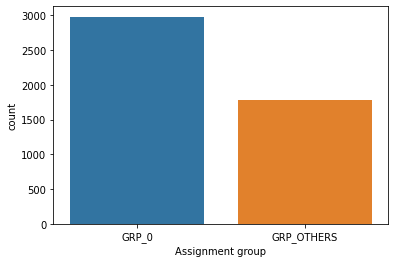

In [ ]:
sns.countplot(binaryData['Assignment group'])

In [ ]:
##Approach#1 - n_gram =(1,1)
from sklearn.feature_extraction.text import TfidfVectorizer
svm_binary_ngram11 = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features)),
               ('clf', SVC(kernel='rbf', C=3,gamma=0.099)),
              ])
svm_binary_ngram11.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

In [ ]:
y_pred_train = .predict(X_train)
print('train accuracy %s' % accursvm_binary_ngram11acy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = svm_binary_ngram11.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SVC_binary_ngram11",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.9149829441091577
train f1 score 0.9165810164516414

accuracy 0.8310598111227702
f1 score 0.8351518517902117
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       596
           1       0.84      0.68      0.75       357

    accuracy                           0.83       953
   macro avg       0.83      0.80      0.81       953
weighted avg       0.83      0.83      0.83       953

[[548  48]
 [113 244]]


In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svm_binary_ngram11.sav'
pickle.dump(svm_binary_ngram11, open(project_path+filename, 'wb'))

In [ ]:
##Approach#1 - n_gram =(1,2)
from sklearn.feature_extraction.text import TfidfVectorizer
svm_binary_ngram12 = Pipeline([('tfidf', TfidfVectorizer(max_features=max_features,ngram_range=(1,2))),
               ('clf', SVC(kernel='rbf', C=3,gamma=0.099)),
              ])
svm_binary_ngram12.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=3, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

In [ ]:
y_pred_train = svm_binary_ngram12.predict(X_train)
print('train accuracy %s' % accuracy_score(y_pred_train,y_train))
print('train f1 score %s' % f1_score(y_pred_train, y_train, average='weighted'))
print()

y_pred = svm_binary_ngram11.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SVC_binary_ngram12",accuracy_score(y_pred_train,y_train),f1_score(y_pred_train,y_train,average='weighted'),accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

train accuracy 0.9170821306743637
train f1 score 0.9186407444404898

accuracy 0.8310598111227702
f1 score 0.8351518517902117
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       596
           1       0.84      0.68      0.75       357

    accuracy                           0.83       953
   macro avg       0.83      0.80      0.81       953
weighted avg       0.83      0.83      0.83       953

[[548  48]
 [113 244]]


In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svm_binary_ngram12.sav'
pickle.dump(svm_binary_ngram12, open(project_path+filename, 'wb'))

In [10]:
#Binary with Smote ngram(1,2)
tvect_binary = TfidfVectorizer(ngram_range=(1,2), max_features=max_features)
tvect_binary.fit(X_train)
trainX_tfidf = tvect_binary.transform(X_train)
tvect_binary.fit(X_test)
testX_tfidf = tvect_binary.transform(X_test)

smote = SMOTE(random_state=777,k_neighbors=5)
X_smote,y_smote = smote.fit_sample(trainX_tfidf, y_train)
smote = SMOTE(random_state=777,k_neighbors=5)
X_test_smote,y_test_smote = smote.fit_sample(testX_tfidf, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
svm_binary_ngram12_smote = SVC(kernel='rbf', C=10, gamma=0.1,decision_function_shape='ovr')
svm_binary_ngram12_smote.fit(X_smote,y_smote)
y_train_pred = svm_binary_ngram12_smote.predict(X_smote)
y_test_pred  = svm_binary_ngram12_smote.predict(X_test_smote)
print("Train dataset")
print(classification_report(y_smote,y_train_pred))
print(confusion_matrix(y_smote,y_train_pred))
print()
print()
print("Test Dataset")
print(classification_report(y_test_smote,y_test_pred))
print(confusion_matrix(y_test_smote,y_test_pred))

Train dataset
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2383
           1       0.98      0.97      0.98      2383

    accuracy                           0.98      4766
   macro avg       0.98      0.98      0.98      4766
weighted avg       0.98      0.98      0.98      4766

[[2333   50]
 [  63 2320]]


Test Dataset
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       596
           1       0.63      0.53      0.58       596

    accuracy                           0.61      1192
   macro avg       0.62      0.61      0.61      1192
weighted avg       0.62      0.61      0.61      1192

[[412 184]
 [278 318]]


In [12]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svm_binary_ngram12_smote.sav'
filename2 = 'svm_binary_ngram12_smote_tvect.sav'
pickle.dump(tvect_binary, open(project_path+filename2, 'wb'))
pickle.dump(svm_binary_ngram12_smote, open(project_path+filename, 'wb'))

In [13]:
#Multi Classifier - All groups except Group_0 (Balance using Smote) -ngram(1,1)
multiData = dataProcessed.copy(deep=True)
multiData = multiData.drop(multiData[multiData['Assignment group'] == 'GRP_0'].index)
x = multiData['newDescription']
y = multiData['Assignment group']

encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)

tvect_multi = TfidfVectorizer(ngram_range=(1,1), max_features=1000)
tvect_multi.fit(X_train)
trainX_tfidf = tvect_multi.transform(X_train)
tvect_multi.fit(X_test)
testX_tfidf = tvect_multi.transform(X_test)

smote = SMOTE(random_state=777,k_neighbors=5)
X_smote,y_smote = smote.fit_sample(trainX_tfidf, y_train)
smote = SMOTE(random_state=777,k_neighbors=5)
X_test_smote,y_test_smote = smote.fit_sample(testX_tfidf, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# Dictionary of group names as key and encoded values as values of dictionary
le_name_mapping_mu = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping_mu)
print()
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'le_name_mapping_mu.pkl'
pickle.dump(le_name_mapping_mu, open(project_path+filename, 'wb'))

{'GRP_12': 0, 'GRP_13': 1, 'GRP_14': 2, 'GRP_19': 3, 'GRP_2': 4, 'GRP_24': 5, 'GRP_25': 6, 'GRP_3': 7, 'GRP_33': 8, 'GRP_8': 9}



In [15]:
svc_multi_smote_ngram11 = SVC(kernel='rbf', C=10, gamma=0.1,decision_function_shape='ovr')
svc_multi_smote_ngram11.fit(X_smote,y_smote)
y_train_pred = svc_multi_smote_ngram11.predict(X_smote)
y_test_pred  = svc_multi_smote_ngram11.predict(X_test_smote)
print("Train dataset")
print(classification_report(y_smote,y_train_pred))
print(confusion_matrix(y_smote,y_train_pred))
print()
print()
print("Test Dataset")
print(classification_report(y_test_smote,y_test_pred))
print(confusion_matrix(y_test_smote,y_test_pred))

Train dataset
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       207
           1       1.00      1.00      1.00       207
           2       0.98      0.96      0.97       207
           3       0.93      0.97      0.95       207
           4       0.93      0.98      0.96       207
           5       0.99      0.92      0.95       207
           6       0.98      0.99      0.99       207
           7       0.95      0.92      0.94       207
           8       0.95      1.00      0.97       207
           9       0.96      0.93      0.95       207

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070

[[195   0   1   0   3   0   1   1   2   4]
 [  0 206   0   0   0   0   1   0   0   0]
 [  5   0 198   0   2   0   0   0   0   2]
 [  0   0   0 200   0   1   0   5   1   0]
 [  0   1   0   2 203   0   0   1   0   0]
 [  2   0   

In [16]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svc_multi_smote_ngram11.sav'
filename2 = 'svc_multi_smote_ngram11_tvect.sav'
pickle.dump(svc_multi_smote_ngram11, open(project_path+filename, 'wb'))
pickle.dump(tvect_multi, open(project_path+filename2, 'wb'))


In [17]:
#Multi Classifier - All groups except Group_0 (Balance using Smote) -ngram(1,2)
multiData = dataProcessed.copy(deep=True)
multiData = multiData.drop(multiData[multiData['Assignment group'] == 'GRP_0'].index)
x = multiData['newDescription']
y = multiData['Assignment group']

encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)

tvect_multi = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tvect_multi.fit(X_train)
trainX_tfidf = tvect_multi.transform(X_train)
tvect_multi.fit(X_test)
testX_tfidf = tvect_multi.transform(X_test)

smote = SMOTE(random_state=777,k_neighbors=5)
X_smote,y_smote = smote.fit_sample(trainX_tfidf, y_train)
smote = SMOTE(random_state=777,k_neighbors=5)
X_test_smote,y_test_smote = smote.fit_sample(testX_tfidf, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [18]:
svc_multi_smote_ngram12 = SVC(kernel='rbf', C=10, gamma=0.1,decision_function_shape='ovr')
svc_multi_smote_ngram12.fit(X_smote,y_smote)
y_train_pred = svc_multi_smote_ngram12.predict(X_smote)
y_test_pred  = svc_multi_smote_ngram12.predict(testX_tfidf)
print("Train dataset")
print(classification_report(y_smote,y_train_pred))
print(confusion_matrix(y_smote,y_train_pred))
print()
print()
print("Test Dataset")
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

Train dataset
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       207
           1       1.00      0.99      0.99       207
           2       0.96      0.95      0.96       207
           3       0.93      0.93      0.93       207
           4       0.92      0.98      0.95       207
           5       0.97      0.90      0.94       207
           6       0.98      0.94      0.96       207
           7       0.94      0.90      0.92       207
           8       0.85      0.98      0.91       207
           9       0.96      0.93      0.94       207

    accuracy                           0.94      2070
   macro avg       0.94      0.94      0.94      2070
weighted avg       0.94      0.94      0.94      2070

[[192   0   1   0   3   1   0   0   5   5]
 [  0 205   1   0   0   0   1   0   0   0]
 [  6   0 197   0   2   0   0   0   0   2]
 [  0   0   1 192   2   1   0   8   2   1]
 [  1   1   0   1 202   0   0   2   0   0]
 [  0   0   

In [19]:
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svc_multi_smote_ngram12.sav'
filename2 = 'svc_multi_smote_ngram12_tvect.sav'
pickle.dump(svc_multi_smote_ngram12, open(project_path+filename, 'wb'))
pickle.dump(tvect_multi, open(project_path+filename2, 'wb'))

MODEL EVALUATION on new data

In [1]:


import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pip install langdetect

In [3]:
!pip install googletrans==3.1.0a0
from googletrans import Translator

In [16]:
# Function to merge Short and Description column into a new column

def createDF(Description, ShortDescription, Caller):
  inp = {'Description': [Description], 'Short description': [Shortdescription], 'Caller':[Caller]}
  data = pd.DataFrame(data=inp)
  return data

def descMerge(data):
  data['newDescription']=data['Description']+ ' '+data['Short description']
  return data['newDescription']

# Replace with nan values
def descReplaceNan(data):
  if (len(str(data['newDescription']))<3):
    data['newDescription']=np.nan

# Language detection
def lan_detect(data):                                        
   try:                                                          
      return detect(data)                                      
   except:                                                       
      return 'no'
# Function to translate the text to english.
def fn_translate(text):
  translator = Translator()
  translation = translator.translate(text, dest='en')
  return translation.text
 
#Remove the rows in the data that have NaN values for newDescription
def descDropRow(data):
  data = data[data['newDescription'].notna()]
  return data
#Strip html tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def lower_text(text):
  print(text)
  lowertext = text.lower()
  return lowertext

def contract_text(text):
    text=text.replace("ain't","am not / are not / is not / has not / have not")
    text=text.replace("aren't","are not / am not")
    text=text.replace("can't","cannot")
    text=text.replace("can't've","cannot have")
    text=text.replace("'cause","because")
    text=text.replace("could've","could have")
    text=text.replace("couldn't","could not")
    text=text.replace("couldn't've","could not have")
    text=text.replace("didn't","did not")
    text=text.replace("doesn't","does not")
    text=text.replace("don't","do not")
    text=text.replace("hadn't","had not")
    text=text.replace("hadn't've","had not have")
    text=text.replace("hasn't","has not")
    text=text.replace("haven't","have not")
    text=text.replace("he'd","he had / he would")
    text=text.replace("he'd've","he would have")
    text=text.replace("he'll","he shall / he will")
    text=text.replace("he'll've","he shall have / he will have")
    text=text.replace("he's","he has / he is")
    text=text.replace("how'd","how did")
    text=text.replace("how'd'y","how do you")
    text=text.replace("how'll","how will")
    text=text.replace("how's","how has / how is / how does")
    text=text.replace("I'd","I had / I would")
    text=text.replace("I'd've","I would have")
    text=text.replace("I'll","I shall / I will")
    text=text.replace("I'll've","I shall have / I will have")
    text=text.replace("I'm","I am")
    text=text.replace("I've","I have")
    text=text.replace("isn't","is not")
    text=text.replace("it'd","it had / it would")
    text=text.replace("it'd've","it would have")
    text=text.replace("it'll","it shall / it will")
    text=text.replace("it'll've","it shall have / it will have")
    text=text.replace("it's","it has / it is")
    text=text.replace("let's","let us")
    text=text.replace("ma'am","madam")
    text=text.replace("mayn't","may not")
    text=text.replace("might've","might have")
    text=text.replace("mightn't","might not")
    text=text.replace("mightn't've","might not have")
    text=text.replace("must've","must have")
    text=text.replace("mustn't","must not")
    text=text.replace("mustn't've","must not have")
    text=text.replace("needn't","need not")
    text=text.replace("needn't've","need not have")
    text=text.replace("o'clock","of the clock")
    text=text.replace("oughtn't","ought not")
    text=text.replace("oughtn't've","ought not have")
    text=text.replace("shan't","shall not")
    text=text.replace("sha'n't","shall not")
    text=text.replace("shan't've","shall not have")
    text=text.replace("she'd","she had / she would")
    text=text.replace("she'd've","she would have")
    text=text.replace("she'll","she shall / she will")
    text=text.replace("she'll've","she shall have / she will have")
    text=text.replace("she's","she has / she is")
    text=text.replace("should've","should have")
    text=text.replace("shouldn't","should not")
    text=text.replace("shouldn't've","should not have")
    text=text.replace("so've","so have")
    text=text.replace("so's","so as / so is")
    text=text.replace("that'd","that would / that had")
    text=text.replace("that'd've","that would have")
    text=text.replace("that's","that has / that is")
    text=text.replace("there'd","there had / there would")
    text=text.replace("there'd've","there would have")
    text=text.replace("there's","there has / there is")
    text=text.replace("they'd","they had / they would")
    text=text.replace("they'd've","they would have")
    text=text.replace("they'll","they shall / they will")
    text=text.replace("they'll've","they shall have / they will have")
    text=text.replace("they're","they are")
    text=text.replace("they've","they have")
    text=text.replace("to've","to have")
    text=text.replace("wasn't","was not")
    text=text.replace("we'd","we had / we would")
    text=text.replace("we'd've","we would have")
    text=text.replace("we'll","we will")
    text=text.replace("we'll've","we will have")
    text=text.replace("we're","we are")
    text=text.replace("we've","we have")
    text=text.replace("weren't","were not")
    text=text.replace("what'll","what shall / what will")
    text=text.replace("what'll've","what shall have / what will have")
    text=text.replace("what're","what are")
    text=text.replace("what's","what has / what is")
    text=text.replace("what've","what have")
    text=text.replace("when's","when has / when is")
    text=text.replace("when've","when have")
    text=text.replace("where'd","where did")
    text=text.replace("where's","where has / where is")
    text=text.replace("where've","where have")
    text=text.replace("who'll","who shall / who will")
    text=text.replace("who'll've","who shall have / who will have")
    text=text.replace("who's","who has / who is")
    text=text.replace("who've","who have")
    text=text.replace("why's","why has / why is")
    text=text.replace("why've","why have")
    text=text.replace("will've","will have")
    text=text.replace("won't","will not")
    text=text.replace("won't've","will not have")
    text=text.replace("would've","would have")
    text=text.replace("wouldn't","would not")
    text=text.replace("wouldn't've","would not have")
    text=text.replace("y'all","you all")
    text=text.replace("y'all'd","you all would")
    text=text.replace("y'all'd've","you all would have")
    text=text.replace("y'all're","you all are")
    text=text.replace("y'all've","you all have")
    text=text.replace("you'd","you had / you would")
    text=text.replace("you'd've","you would have")
    text=text.replace("you'll","you shall / you will")
    text=text.replace("you'll've","you shall have / you will have")
    text=text.replace("you're","you are")
    text=text.replace("you've","you have")
   
    return text



#Data cleaning
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'') 
    text = re.sub(r'\S*@\S*\s?', '', text) #remove email    
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi ', '')
    text=text.replace('sir', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('kindly', '')
    text=text.replace('yes', '')
    text=text.replace('no ', '')
    text=text.replace(' able ', '')
    text=text.replace('cannot', '')
    text=text.replace('regards', '')
    text=text.replace('dear', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('pls', '')
    text=text.replace('regards', '')
    text=text.replace('please contact', '')
    text=text.replace('i am', '')
    text=text.replace('help', '')
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'\w+(?=\s+:)', ' ', text) # remove word before : sign
    text = re.sub(r'\w+(?=\:)', ' ', text) # remove word before : sign
    text = re.sub(r'^a-zA-z0-9\s', ' ', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\r\n', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'\S+.com', ' ',text)
    text = re.sub(r'\b\w{1,2}\b', '',text)  #drop words with less than 3 characters
    text = text.lower()
    return text

# remove extra white space
def whitesp(text):
  pattern = r'[' +',' ']'
  text = re.sub(pattern, '', text)
  return text

# Split Caller name column
def callerSplit(data):
  if not data['Caller'].isna().any():
    data = data.join(data['Caller'].str.split(' ', 1, expand=True).rename(columns={0:'CallerFirst', 1:'CallerLast'}))
  else:
    data['CallerFirst'] = "and"
    data['CallerLast'] = "and"
  return data  
# Caller Name replace with blank space in description section
def callerNameReplace(data):
  if 'CallerLast' in data:
    print()
  else:
    data['CallerLast']= data['CallerFirst']
  text1 = data['newDescription'][0]
  text2 = data['CallerFirst'][0]
  text3 = data['CallerLast'][0]
  replaceDesc1 = text1.replace(text2," ")
  replaceDesc2 = replaceDesc1.replace(text3," ")
  data['newDescription'] = replaceDesc2  
  return data
 
#Remove stop words
def stopWord(data):
  data['newDescription'] = data['newDescription'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
  return data

#Lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()]) 

#Remove white space
def whitesp(text):
  pattern = r'[' +',' ']'
  text = re.sub(pattern, '', text)
  return text
  
#Lemmatization
def lemmatize2(data):
  data['newDescription']= data['newDescription'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
  return data['newDescription']

# words repeatitions found in a description- remove the repetitions
def removeRepeats(myText):
    l = myText.split()
    temp = []
    for x in l:
        if x not in temp:
            temp.append(x)
    return ' '.join(temp)


# mapping the prediction with the group name
def pred_mapping(num,le_name_mapping):
  predictedGroup = list(le_name_mapping.keys())[list(le_name_mapping.values()).index(num)]
  print(predictedGroup)

In [17]:
#Input 
Description = "received from: monitoring_tool@company.com job Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00"
Shortdescription = ""
Caller = "gordan ramsay"
data = {'Description': [Description], 'Shortdescription': [Shortdescription], 'Caller':[Caller]}
df = pd.DataFrame(data=data)
df = df.replace(r'^\s*$', np.nan, regex=True)


In [18]:
df

,Description,Shortdescription,Caller
0,received from: monitoring_tool@company.com job...,NaN,gordan ramsay


In [19]:
df = createDF(Description, Shortdescription, Caller)

df['newDescription'] = descMerge(df)

descReplaceNan(df)

df['language'] = df['newDescription'].apply(lan_detect)

translated = fn_translate(df['newDescription'][0])
df['newDescription'] = translated

strip_text = strip_html_tags(df['newDescription'][0])
df['newDescription'] = strip_text

lower_text = lower_text(df['newDescription'][0])
df['newDescription'] = lower_text 

contract_text = contract_text(df['newDescription'][0])
df['newDescription'] = contract_text

df['newDescription'] = clean_text(df['newDescription'][0])

df['newDescription'] = whitesp(df['newDescription'][0])

df = callerSplit(df)

df = df.replace(r'^\s*$', np.nan, regex=True)

df = callerNameReplace(df)

df = stopWord(df)

df['newDescription'] = whitesp(df['newDescription'][0])

#df['newDescription'] = lemmatize2(df)

df['newDescription'] = removeRepeats(df['newDescription'][0])

# X value
X_new = df['newDescription']
print(X_new)

received from: monitoring_tool@company.com job Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00

0    job failed scheduler
Name: newDescription, dtype: object


In [28]:
print(df['Description'][0])

## load the label encoders from disk  -
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'le_name_mapping.pkl'
le_name_mapping1 = pickle.load(open(project_path+filename, 'rb'))
filename = 'le_name_mapping_bi.pkl'
le_name_mapping_bi = pickle.load(open(project_path+filename, 'rb'))
filename = 'le_name_mapping_mu.pkl'
le_name_mapping_mu = pickle.load(open(project_path+filename, 'rb'))

#Load models and predict

#Model#13
filename = 'svm_binary_ngram11.sav'
loaded_model_svm_binary_ngram11 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm_binary_ngram11 = loaded_model_svm_binary_ngram11.predict(X_new)
pred_mapping(y_pred_new_svm_binary_ngram11,le_name_mapping_bi)

#Model#14
filename = 'svm_binary_ngram12.sav'
loaded_model_svm_binary_ngram12 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm_binary_ngram12 = loaded_model_svm_binary_ngram12.predict(X_new)
pred_mapping(y_pred_new_svm_binary_ngram12,le_name_mapping_bi)

#Model#15
filename = 'svm_binary_ngram12_smote.sav'
filename2 = 'svm_binary_ngram12_smote_tvect.sav'
loaded_model_svm_binary_ngram12_smote = pickle.load(open(project_path+filename, 'rb'))
loaded_tvect_svm_binary_ngram12_smote = pickle.load(open(project_path+filename2, 'rb'))
X_new_tfidf = loaded_tvect_svm_binary_ngram12_smote.transform(X_new)
y_pred_new_svm_binary_ngram12_smote = loaded_model_svm_binary_ngram12_smote.predict(X_new_tfidf)
pred_mapping(y_pred_new_svm_binary_ngram12_smote,le_name_mapping_bi)


#Model#1
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svm.sav'
loaded_model_svm = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm = loaded_model_svm.predict(X_new)
pred_mapping(y_pred_new_svm,le_name_mapping1)

#Model#2
filename = 'svm_ng2.sav'
loaded_model_svm_ng2 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm_ng2 = loaded_model_svm_ng2.predict(X_new)
pred_mapping(y_pred_new_svm_ng2,le_name_mapping1)

#Model#3

filename = 'svc_smote.sav'
loaded_model_svc_smote = pickle.load(open(project_path+filename, 'rb'))
filename2 = 'svc_smote_tvect.sav'
loaded_tvect_svm = pickle.load(open(project_path+filename2, 'rb'))
X_new_tfidf = loaded_tvect_svm.transform(X_new)
y_pred_new_svc_smote = loaded_model_svc_smote.predict(X_new_tfidf)
pred_mapping(y_pred_new_svc_smote,le_name_mapping1)


#Model#4
filename = 'rfc.sav'
loaded_model_rfc = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_rfc = loaded_model_rfc.predict(X_new)
pred_mapping(y_pred_new_rfc,le_name_mapping1)

#Model#5
filename = 'rfc_ng2.sav'
loaded_model_rfc_ng2 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_rfc_ng2 = loaded_model_rfc_ng2.predict(X_new)
pred_mapping(y_pred_new_rfc_ng2,le_name_mapping1)


#Model#6
filename = 'rfc_smote.sav'
loaded_model_rfc_smote = pickle.load(open(project_path+filename, 'rb'))
filename2 = 'rfc_smote_tvect.sav'
loaded_tvect_rfc = pickle.load(open(project_path+filename2, 'rb'))
X_new_tfidf = loaded_tvect_rfc.transform(X_new)
y_pred_new_rfc_smote = loaded_model_rfc_smote.predict(X_new_tfidf)
pred_mapping(y_pred_new_rfc_smote,le_name_mapping1)

#Model#7
filename = 'gbc.sav'
loaded_model_gbc = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_gbc = loaded_model_gbc.predict(X_new)
pred_mapping(y_pred_new_gbc,le_name_mapping1)

#Model#8
filename = 'gbc_ng2.sav'
loaded_model_gbc_ng2 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_gbc_ng2 = loaded_model_gbc_ng2.predict(X_new)
pred_mapping(y_pred_new_gbc_ng2,le_name_mapping1)


#Model#9
filename = 'gbc_smote.sav'
filename2 = 'gbc_smote_tvect.sav'
loaded_model_gbc_smote = pickle.load(open(project_path+filename, 'rb'))
loaded_tvect_gbc = pickle.load(open(project_path+filename2, 'rb'))
X_new_tfidf = loaded_tvect_gbc.transform(X_new)
y_pred_new_gbc_smote = loaded_model_gbc_smote.predict(X_new_tfidf)
pred_mapping(y_pred_new_gbc_smote,le_name_mapping1)


#Model#10
filename = 'xgbc.sav'
loaded_model_xgbc = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_xgbc = loaded_model_xgbc.predict(X_new)
pred_mapping(y_pred_new_xgbc,le_name_mapping1)

#Model#11
filename = 'xgbc_ng2.sav'
loaded_model_xgbc_smote = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_xgbc_ng2 = loaded_model_xgbc_smote.predict(X_new)
pred_mapping(y_pred_new_xgbc_ng2,le_name_mapping1)

#Model#12
filename = 'xgbc_smote.sav'
filename2 = 'xgbc_smote_tvect.sav'
loaded_model_xgbc_smote = pickle.load(open(project_path+filename, 'rb'))
loaded_tvect_xgbc = pickle.load(open(project_path+filename2, 'rb'))
X_new_tfidf = loaded_tvect_xgbc.transform(X_new)
y_pred_new_xgbc_smote = loaded_model_xgbc_smote.predict(X_new_tfidf)
pred_mapping(y_pred_new_xgbc_smote,le_name_mapping1)


#Model#16
filename = 'svc_multi_smote_ngram11.sav'
filename2 = 'svc_multi_smote_ngram11_tvect.sav'
loaded_model_svm_multi_ngram11 = pickle.load(open(project_path+filename, 'rb'))
loaded_tvect_svm_multi_ngram11 = pickle.load(open(project_path+filename2, 'rb'))
X_new_tfidf = loaded_tvect_svm_multi_ngram11.transform(X_new)
y_pred_new_svm_multi_ngram11 = loaded_model_svm_multi_ngram11.predict(X_new_tfidf)
pred_mapping(y_pred_new_svm_multi_ngram11,le_name_mapping_mu)

#Model#17
filename = 'svc_multi_smote_ngram12.sav'
filename2 = 'svc_multi_smote_ngram12_tvect.sav'
loaded_model_svm_multi_ngram12 = pickle.load(open(project_path+filename, 'rb'))
loaded_tvect_svm_multi_ngram12 = pickle.load(open(project_path+filename2, 'rb'))
X_new_tfidf = loaded_tvect_svm_multi_ngram12.transform(X_new)
y_pred_new_svm_multi_ngram12 = loaded_model_svm_multi_ngram12.predict(X_new_tfidf)
pred_mapping(y_pred_new_svm_multi_ngram12,le_name_mapping_mu)


received from: monitoring_tool@company.com job Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00
GRP_OTHERS
GRP_OTHERS
GRP_0
GRP_8
GRP_8
GRP_0
GRP_8
GRP_8
GRP_0
GRP_8
GRP_8
GRP_0
GRP_8
GRP_8
GRP_0
GRP_2
GRP_12


Conclusion the Auto ML model shows that the models trained on SMOTE are not predicting well because they were overfitting.<br> We will use the Binary without SMOTE and and the other models
such as SVC, RF, GBC and XGboost for predictions

In [29]:
print(df['Description'][0])

## load the label encoders from disk  -
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'le_name_mapping.pkl'
le_name_mapping1 = pickle.load(open(project_path+filename, 'rb'))
filename = 'le_name_mapping_bi.pkl'
le_name_mapping_bi = pickle.load(open(project_path+filename, 'rb'))
filename = 'le_name_mapping_mu.pkl'
le_name_mapping_mu = pickle.load(open(project_path+filename, 'rb'))

#Load models and predict

#Model#13
filename = 'svm_binary_ngram11.sav'
loaded_model_svm_binary_ngram11 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm_binary_ngram11 = loaded_model_svm_binary_ngram11.predict(X_new)
pred_mapping(y_pred_new_svm_binary_ngram11,le_name_mapping_bi)

#Model#14
filename = 'svm_binary_ngram12.sav'
loaded_model_svm_binary_ngram12 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm_binary_ngram12 = loaded_model_svm_binary_ngram12.predict(X_new)
pred_mapping(y_pred_new_svm_binary_ngram12,le_name_mapping_bi)



#Model#1
project_path = "/content/drive/My Drive/Colab Notebooks/"
filename = 'svm.sav'
loaded_model_svm = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm = loaded_model_svm.predict(X_new)
pred_mapping(y_pred_new_svm,le_name_mapping1)

#Model#2
filename = 'svm_ng2.sav'
loaded_model_svm_ng2 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_svm_ng2 = loaded_model_svm_ng2.predict(X_new)
pred_mapping(y_pred_new_svm_ng2,le_name_mapping1)



#Model#4
filename = 'rfc.sav'
loaded_model_rfc = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_rfc = loaded_model_rfc.predict(X_new)
pred_mapping(y_pred_new_rfc,le_name_mapping1)

#Model#5
filename = 'rfc_ng2.sav'
loaded_model_rfc_ng2 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_rfc_ng2 = loaded_model_rfc_ng2.predict(X_new)
pred_mapping(y_pred_new_rfc_ng2,le_name_mapping1)



#Model#7
filename = 'gbc.sav'
loaded_model_gbc = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_gbc = loaded_model_gbc.predict(X_new)
pred_mapping(y_pred_new_gbc,le_name_mapping1)

#Model#8
filename = 'gbc_ng2.sav'
loaded_model_gbc_ng2 = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_gbc_ng2 = loaded_model_gbc_ng2.predict(X_new)
pred_mapping(y_pred_new_gbc_ng2,le_name_mapping1)





#Model#10
filename = 'xgbc.sav'
loaded_model_xgbc = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_xgbc = loaded_model_xgbc.predict(X_new)
pred_mapping(y_pred_new_xgbc,le_name_mapping1)

#Model#11
filename = 'xgbc_ng2.sav'
loaded_model_xgbc_smote = pickle.load(open(project_path+filename, 'rb'))
y_pred_new_xgbc_ng2 = loaded_model_xgbc_smote.predict(X_new)
pred_mapping(y_pred_new_xgbc_ng2,le_name_mapping1)



received from: monitoring_tool@company.com job Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00
GRP_OTHERS
GRP_OTHERS
GRP_8
GRP_8
GRP_8
GRP_8
GRP_8
GRP_8
GRP_8
GRP_8
